In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Using TensorFlow backend.


In [0]:
# Get training data and test data from fashion mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
#Invert colors and normalize and scale the pixel data
x_train = x_train/-127.5+1

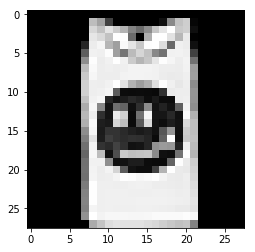

In [72]:
plt.imshow(x_train[101], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [75]:
def construct_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = construct_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 1024)             

In [76]:
def construct_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = construct_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.860986, acc.: 51.56%] [G loss: 0.924770]


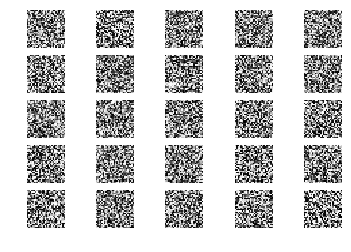

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.398347, acc.: 92.19%] [G loss: 0.910325]
2 [D loss: 0.298626, acc.: 93.75%] [G loss: 1.019944]
3 [D loss: 0.231872, acc.: 98.44%] [G loss: 1.174945]
4 [D loss: 0.255966, acc.: 95.31%] [G loss: 1.284353]
5 [D loss: 0.210936, acc.: 100.00%] [G loss: 1.404338]
6 [D loss: 0.169775, acc.: 100.00%] [G loss: 1.553915]
7 [D loss: 0.177616, acc.: 98.44%] [G loss: 1.584758]
8 [D loss: 0.128580, acc.: 100.00%] [G loss: 1.710278]
9 [D loss: 0.142520, acc.: 100.00%] [G loss: 1.792629]
10 [D loss: 0.108332, acc.: 100.00%] [G loss: 1.925836]
11 [D loss: 0.100218, acc.: 100.00%] [G loss: 2.055852]
12 [D loss: 0.105621, acc.: 100.00%] [G loss: 1.966295]
13 [D loss: 0.082000, acc.: 100.00%] [G loss: 2.058605]
14 [D loss: 0.080489, acc.: 100.00%] [G loss: 2.141776]
15 [D loss: 0.088906, acc.: 100.00%] [G loss: 2.178704]
16 [D loss: 0.066381, acc.: 100.00%] [G loss: 2.337617]
17 [D loss: 0.082501, acc.: 100.00%] [G loss: 2.423824]
18 [D loss: 0.090481, acc.: 98.44%] [G loss: 2.259442]
19 [D l

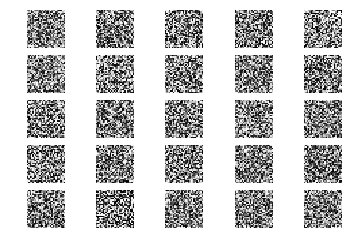

51 [D loss: 0.029990, acc.: 100.00%] [G loss: 3.595998]
52 [D loss: 0.023099, acc.: 100.00%] [G loss: 3.747945]
53 [D loss: 0.024076, acc.: 100.00%] [G loss: 3.732229]
54 [D loss: 0.019708, acc.: 100.00%] [G loss: 3.616131]
55 [D loss: 0.017171, acc.: 100.00%] [G loss: 3.895771]
56 [D loss: 0.022402, acc.: 100.00%] [G loss: 3.755641]
57 [D loss: 0.024439, acc.: 100.00%] [G loss: 3.807603]
58 [D loss: 0.021558, acc.: 100.00%] [G loss: 3.834157]
59 [D loss: 0.013503, acc.: 100.00%] [G loss: 3.935942]
60 [D loss: 0.024897, acc.: 100.00%] [G loss: 3.908393]
61 [D loss: 0.021401, acc.: 100.00%] [G loss: 3.893095]
62 [D loss: 0.017196, acc.: 100.00%] [G loss: 3.846076]
63 [D loss: 0.014300, acc.: 100.00%] [G loss: 3.946057]
64 [D loss: 0.031992, acc.: 98.44%] [G loss: 3.901984]
65 [D loss: 0.036221, acc.: 98.44%] [G loss: 3.945960]
66 [D loss: 0.020320, acc.: 100.00%] [G loss: 3.938769]
67 [D loss: 0.015781, acc.: 100.00%] [G loss: 3.992330]
68 [D loss: 0.019677, acc.: 100.00%] [G loss: 4.03

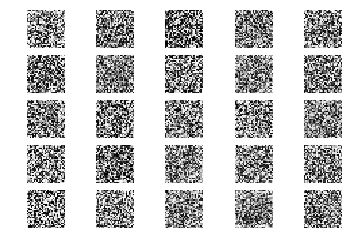

101 [D loss: 0.020267, acc.: 100.00%] [G loss: 4.560454]
102 [D loss: 0.013007, acc.: 100.00%] [G loss: 4.666816]
103 [D loss: 0.012543, acc.: 100.00%] [G loss: 4.583235]
104 [D loss: 0.021369, acc.: 100.00%] [G loss: 4.568703]
105 [D loss: 0.016031, acc.: 100.00%] [G loss: 4.497925]
106 [D loss: 0.010291, acc.: 100.00%] [G loss: 4.564322]
107 [D loss: 0.013775, acc.: 100.00%] [G loss: 4.613958]
108 [D loss: 0.007766, acc.: 100.00%] [G loss: 4.607011]
109 [D loss: 0.018776, acc.: 100.00%] [G loss: 4.519194]
110 [D loss: 0.013840, acc.: 100.00%] [G loss: 4.467448]
111 [D loss: 0.013082, acc.: 100.00%] [G loss: 4.639584]
112 [D loss: 0.011683, acc.: 100.00%] [G loss: 4.622103]
113 [D loss: 0.013322, acc.: 100.00%] [G loss: 4.632636]
114 [D loss: 0.013852, acc.: 100.00%] [G loss: 4.615303]
115 [D loss: 0.011500, acc.: 100.00%] [G loss: 4.575457]
116 [D loss: 0.019550, acc.: 100.00%] [G loss: 4.801635]
117 [D loss: 0.013693, acc.: 100.00%] [G loss: 4.666419]
118 [D loss: 0.015585, acc.: 10

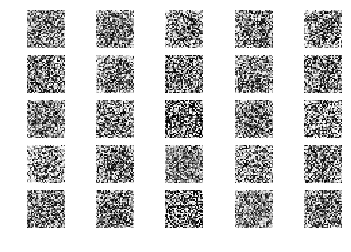

151 [D loss: 0.010262, acc.: 100.00%] [G loss: 4.493252]
152 [D loss: 0.035508, acc.: 100.00%] [G loss: 4.616528]
153 [D loss: 0.022565, acc.: 100.00%] [G loss: 4.813902]
154 [D loss: 0.037752, acc.: 98.44%] [G loss: 4.641371]
155 [D loss: 0.021481, acc.: 100.00%] [G loss: 4.569698]
156 [D loss: 0.060697, acc.: 98.44%] [G loss: 5.026899]
157 [D loss: 0.024672, acc.: 100.00%] [G loss: 4.983608]
158 [D loss: 0.027008, acc.: 100.00%] [G loss: 4.930021]
159 [D loss: 0.063183, acc.: 100.00%] [G loss: 4.407847]
160 [D loss: 0.062353, acc.: 96.88%] [G loss: 4.629336]
161 [D loss: 0.134218, acc.: 93.75%] [G loss: 4.804636]
162 [D loss: 0.029278, acc.: 100.00%] [G loss: 5.146377]
163 [D loss: 0.074572, acc.: 98.44%] [G loss: 4.841615]
164 [D loss: 0.043774, acc.: 98.44%] [G loss: 5.224030]
165 [D loss: 0.038900, acc.: 100.00%] [G loss: 5.207993]
166 [D loss: 0.040198, acc.: 98.44%] [G loss: 4.941198]
167 [D loss: 0.038287, acc.: 100.00%] [G loss: 5.164707]
168 [D loss: 0.056193, acc.: 100.00%] 

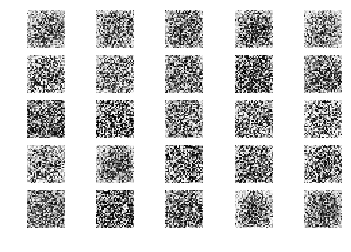

201 [D loss: 0.092222, acc.: 96.88%] [G loss: 4.417083]
202 [D loss: 0.048490, acc.: 100.00%] [G loss: 4.339470]
203 [D loss: 0.144513, acc.: 93.75%] [G loss: 3.879741]
204 [D loss: 0.144847, acc.: 92.19%] [G loss: 4.046596]
205 [D loss: 0.082855, acc.: 95.31%] [G loss: 4.595976]
206 [D loss: 0.210117, acc.: 92.19%] [G loss: 3.608161]
207 [D loss: 0.090194, acc.: 95.31%] [G loss: 4.405591]
208 [D loss: 0.157401, acc.: 93.75%] [G loss: 4.236045]
209 [D loss: 0.043061, acc.: 100.00%] [G loss: 4.522395]
210 [D loss: 0.075064, acc.: 98.44%] [G loss: 4.340377]
211 [D loss: 0.122274, acc.: 96.88%] [G loss: 4.570570]
212 [D loss: 0.104368, acc.: 95.31%] [G loss: 4.202569]
213 [D loss: 0.111616, acc.: 96.88%] [G loss: 3.689259]
214 [D loss: 0.072383, acc.: 98.44%] [G loss: 3.773274]
215 [D loss: 0.079917, acc.: 98.44%] [G loss: 4.801392]
216 [D loss: 0.125127, acc.: 95.31%] [G loss: 4.458788]
217 [D loss: 0.098134, acc.: 96.88%] [G loss: 4.496130]
218 [D loss: 0.088063, acc.: 98.44%] [G loss: 

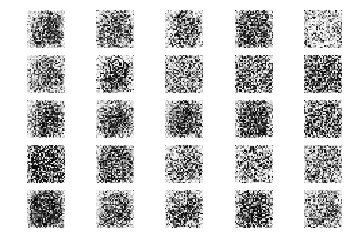

251 [D loss: 0.532851, acc.: 75.00%] [G loss: 3.028896]
252 [D loss: 0.213146, acc.: 90.62%] [G loss: 4.061967]
253 [D loss: 0.405532, acc.: 92.19%] [G loss: 3.517029]
254 [D loss: 0.150744, acc.: 95.31%] [G loss: 3.674794]
255 [D loss: 0.123550, acc.: 96.88%] [G loss: 4.001970]
256 [D loss: 0.287354, acc.: 87.50%] [G loss: 3.498740]
257 [D loss: 0.129024, acc.: 93.75%] [G loss: 4.050016]
258 [D loss: 0.174292, acc.: 95.31%] [G loss: 3.125004]
259 [D loss: 0.074043, acc.: 98.44%] [G loss: 3.375892]
260 [D loss: 0.115455, acc.: 98.44%] [G loss: 4.316166]
261 [D loss: 0.319115, acc.: 87.50%] [G loss: 4.414873]
262 [D loss: 0.168450, acc.: 95.31%] [G loss: 3.744843]
263 [D loss: 0.163614, acc.: 90.62%] [G loss: 4.670256]
264 [D loss: 0.151872, acc.: 93.75%] [G loss: 4.698928]
265 [D loss: 0.245679, acc.: 89.06%] [G loss: 2.785000]
266 [D loss: 0.171480, acc.: 90.62%] [G loss: 4.331628]
267 [D loss: 0.153181, acc.: 92.19%] [G loss: 4.112302]
268 [D loss: 0.129288, acc.: 98.44%] [G loss: 4.

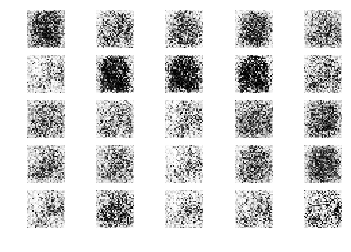

301 [D loss: 0.336890, acc.: 79.69%] [G loss: 3.148643]
302 [D loss: 0.644821, acc.: 70.31%] [G loss: 2.647342]
303 [D loss: 0.445420, acc.: 87.50%] [G loss: 3.153799]
304 [D loss: 0.342681, acc.: 81.25%] [G loss: 2.918286]
305 [D loss: 0.538098, acc.: 71.88%] [G loss: 2.993664]
306 [D loss: 0.230756, acc.: 95.31%] [G loss: 3.257821]
307 [D loss: 0.458736, acc.: 78.12%] [G loss: 2.390893]
308 [D loss: 0.275327, acc.: 87.50%] [G loss: 2.746978]
309 [D loss: 0.316331, acc.: 89.06%] [G loss: 2.586587]
310 [D loss: 0.446582, acc.: 76.56%] [G loss: 2.767466]
311 [D loss: 0.415591, acc.: 85.94%] [G loss: 3.404581]
312 [D loss: 0.492501, acc.: 75.00%] [G loss: 1.927652]
313 [D loss: 0.407107, acc.: 73.44%] [G loss: 3.632500]
314 [D loss: 0.536474, acc.: 78.12%] [G loss: 2.598660]
315 [D loss: 0.322241, acc.: 95.31%] [G loss: 2.387004]
316 [D loss: 0.359518, acc.: 85.94%] [G loss: 2.985474]
317 [D loss: 0.403423, acc.: 87.50%] [G loss: 2.751968]
318 [D loss: 0.554525, acc.: 87.50%] [G loss: 2.

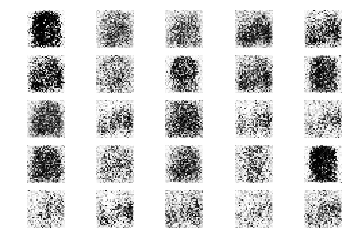

351 [D loss: 0.679761, acc.: 68.75%] [G loss: 2.333183]
352 [D loss: 1.050577, acc.: 50.00%] [G loss: 1.860003]
353 [D loss: 0.383922, acc.: 89.06%] [G loss: 1.801619]
354 [D loss: 0.379315, acc.: 81.25%] [G loss: 2.120474]
355 [D loss: 0.410625, acc.: 85.94%] [G loss: 2.129175]
356 [D loss: 0.657041, acc.: 62.50%] [G loss: 1.685977]
357 [D loss: 0.433072, acc.: 85.94%] [G loss: 2.187075]
358 [D loss: 0.624732, acc.: 73.44%] [G loss: 1.657958]
359 [D loss: 0.609231, acc.: 67.19%] [G loss: 1.769114]
360 [D loss: 0.512971, acc.: 73.44%] [G loss: 2.086071]
361 [D loss: 0.539193, acc.: 73.44%] [G loss: 1.730070]
362 [D loss: 0.415643, acc.: 82.81%] [G loss: 2.095521]
363 [D loss: 0.540574, acc.: 68.75%] [G loss: 1.829570]
364 [D loss: 0.555792, acc.: 73.44%] [G loss: 1.616093]
365 [D loss: 0.653361, acc.: 71.88%] [G loss: 1.798954]
366 [D loss: 0.721333, acc.: 62.50%] [G loss: 1.676944]
367 [D loss: 0.591824, acc.: 81.25%] [G loss: 1.784338]
368 [D loss: 0.591000, acc.: 73.44%] [G loss: 1.

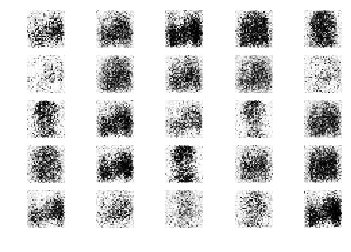

401 [D loss: 0.547341, acc.: 81.25%] [G loss: 1.200562]
402 [D loss: 0.589151, acc.: 73.44%] [G loss: 1.329511]
403 [D loss: 0.663614, acc.: 65.62%] [G loss: 1.415095]
404 [D loss: 0.551224, acc.: 75.00%] [G loss: 1.363845]
405 [D loss: 0.459820, acc.: 76.56%] [G loss: 1.478580]
406 [D loss: 0.566639, acc.: 73.44%] [G loss: 1.521282]
407 [D loss: 0.522963, acc.: 79.69%] [G loss: 1.620798]
408 [D loss: 0.526980, acc.: 65.62%] [G loss: 1.354399]
409 [D loss: 0.523031, acc.: 76.56%] [G loss: 1.450792]
410 [D loss: 0.505835, acc.: 81.25%] [G loss: 1.455270]
411 [D loss: 0.697311, acc.: 64.06%] [G loss: 1.342860]
412 [D loss: 0.658264, acc.: 62.50%] [G loss: 1.429090]
413 [D loss: 0.686572, acc.: 71.88%] [G loss: 1.311273]
414 [D loss: 0.560434, acc.: 71.88%] [G loss: 1.369258]
415 [D loss: 0.583275, acc.: 73.44%] [G loss: 1.433453]
416 [D loss: 0.606694, acc.: 70.31%] [G loss: 1.333543]
417 [D loss: 0.615527, acc.: 73.44%] [G loss: 1.206272]
418 [D loss: 0.662444, acc.: 60.94%] [G loss: 1.

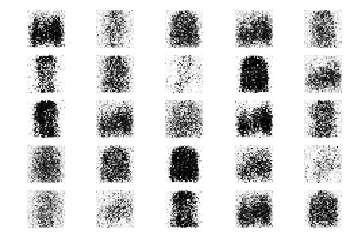

451 [D loss: 0.683319, acc.: 60.94%] [G loss: 1.239773]
452 [D loss: 0.570067, acc.: 68.75%] [G loss: 1.248219]
453 [D loss: 0.528103, acc.: 71.88%] [G loss: 1.207489]
454 [D loss: 0.613746, acc.: 78.12%] [G loss: 1.060455]
455 [D loss: 0.565771, acc.: 71.88%] [G loss: 1.022164]
456 [D loss: 0.577928, acc.: 76.56%] [G loss: 1.247324]
457 [D loss: 0.603001, acc.: 67.19%] [G loss: 1.157842]
458 [D loss: 0.650897, acc.: 68.75%] [G loss: 1.259157]
459 [D loss: 0.602992, acc.: 75.00%] [G loss: 1.140128]
460 [D loss: 0.513766, acc.: 76.56%] [G loss: 1.133173]
461 [D loss: 0.591845, acc.: 65.62%] [G loss: 1.084222]
462 [D loss: 0.554361, acc.: 71.88%] [G loss: 1.323036]
463 [D loss: 0.608752, acc.: 76.56%] [G loss: 1.330474]
464 [D loss: 0.594951, acc.: 70.31%] [G loss: 1.085999]
465 [D loss: 0.598718, acc.: 65.62%] [G loss: 1.095299]
466 [D loss: 0.539304, acc.: 70.31%] [G loss: 1.159290]
467 [D loss: 0.576115, acc.: 68.75%] [G loss: 1.213736]
468 [D loss: 0.640807, acc.: 62.50%] [G loss: 1.

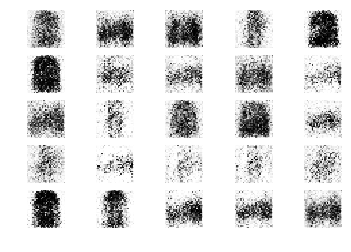

501 [D loss: 0.563112, acc.: 62.50%] [G loss: 1.231747]
502 [D loss: 0.526369, acc.: 79.69%] [G loss: 1.112469]
503 [D loss: 0.572112, acc.: 68.75%] [G loss: 1.165255]
504 [D loss: 0.651603, acc.: 59.38%] [G loss: 1.211975]
505 [D loss: 0.502020, acc.: 76.56%] [G loss: 1.269289]
506 [D loss: 0.639144, acc.: 65.62%] [G loss: 1.265366]
507 [D loss: 0.677685, acc.: 62.50%] [G loss: 1.119952]
508 [D loss: 0.621425, acc.: 68.75%] [G loss: 1.044757]
509 [D loss: 0.603039, acc.: 70.31%] [G loss: 1.249120]
510 [D loss: 0.686325, acc.: 65.62%] [G loss: 1.043741]
511 [D loss: 0.550215, acc.: 70.31%] [G loss: 1.058825]
512 [D loss: 0.620790, acc.: 67.19%] [G loss: 1.137212]
513 [D loss: 0.721470, acc.: 56.25%] [G loss: 1.100601]
514 [D loss: 0.554181, acc.: 68.75%] [G loss: 1.185922]
515 [D loss: 0.605079, acc.: 65.62%] [G loss: 1.139657]
516 [D loss: 0.604849, acc.: 68.75%] [G loss: 1.090354]
517 [D loss: 0.623759, acc.: 71.88%] [G loss: 1.143029]
518 [D loss: 0.542427, acc.: 73.44%] [G loss: 1.

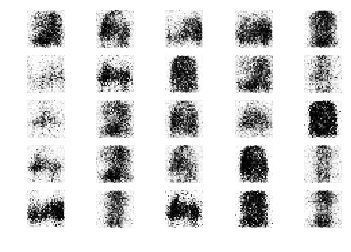

551 [D loss: 0.586804, acc.: 67.19%] [G loss: 1.226969]
552 [D loss: 0.579578, acc.: 67.19%] [G loss: 1.225629]
553 [D loss: 0.599154, acc.: 68.75%] [G loss: 1.135979]
554 [D loss: 0.593939, acc.: 71.88%] [G loss: 1.138667]
555 [D loss: 0.510324, acc.: 76.56%] [G loss: 1.085307]
556 [D loss: 0.590459, acc.: 67.19%] [G loss: 1.116495]
557 [D loss: 0.575150, acc.: 79.69%] [G loss: 1.184708]
558 [D loss: 0.582069, acc.: 78.12%] [G loss: 1.143312]
559 [D loss: 0.540916, acc.: 70.31%] [G loss: 1.140946]
560 [D loss: 0.540354, acc.: 75.00%] [G loss: 1.221344]
561 [D loss: 0.525952, acc.: 76.56%] [G loss: 1.176572]
562 [D loss: 0.582225, acc.: 70.31%] [G loss: 1.253888]
563 [D loss: 0.493240, acc.: 81.25%] [G loss: 1.201488]
564 [D loss: 0.677349, acc.: 60.94%] [G loss: 1.222458]
565 [D loss: 0.588918, acc.: 71.88%] [G loss: 1.197320]
566 [D loss: 0.539172, acc.: 71.88%] [G loss: 1.146591]
567 [D loss: 0.593722, acc.: 76.56%] [G loss: 1.132946]
568 [D loss: 0.609444, acc.: 71.88%] [G loss: 1.

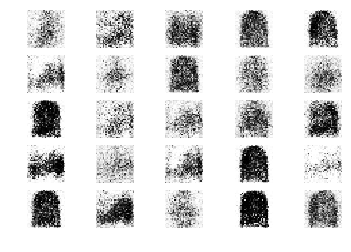

601 [D loss: 0.561799, acc.: 71.88%] [G loss: 1.128064]
602 [D loss: 0.576762, acc.: 73.44%] [G loss: 1.207778]
603 [D loss: 0.581910, acc.: 70.31%] [G loss: 1.210267]
604 [D loss: 0.597491, acc.: 70.31%] [G loss: 1.046667]
605 [D loss: 0.599568, acc.: 70.31%] [G loss: 1.081834]
606 [D loss: 0.548863, acc.: 76.56%] [G loss: 1.046508]
607 [D loss: 0.566161, acc.: 68.75%] [G loss: 1.100767]
608 [D loss: 0.438138, acc.: 84.38%] [G loss: 1.231247]
609 [D loss: 0.565490, acc.: 70.31%] [G loss: 1.205744]
610 [D loss: 0.595826, acc.: 65.62%] [G loss: 1.218356]
611 [D loss: 0.577105, acc.: 78.12%] [G loss: 1.252537]
612 [D loss: 0.625728, acc.: 64.06%] [G loss: 1.234168]
613 [D loss: 0.493469, acc.: 75.00%] [G loss: 1.164740]
614 [D loss: 0.563074, acc.: 73.44%] [G loss: 1.220239]
615 [D loss: 0.529835, acc.: 75.00%] [G loss: 1.237409]
616 [D loss: 0.535304, acc.: 78.12%] [G loss: 1.297206]
617 [D loss: 0.601203, acc.: 78.12%] [G loss: 1.186593]
618 [D loss: 0.652890, acc.: 62.50%] [G loss: 1.

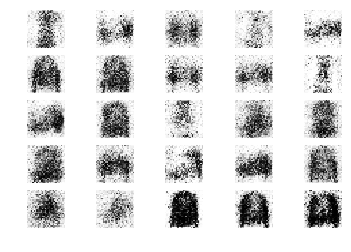

651 [D loss: 0.662154, acc.: 56.25%] [G loss: 1.207579]
652 [D loss: 0.473888, acc.: 87.50%] [G loss: 1.104321]
653 [D loss: 0.640327, acc.: 60.94%] [G loss: 1.022680]
654 [D loss: 0.653152, acc.: 68.75%] [G loss: 1.051368]
655 [D loss: 0.521718, acc.: 81.25%] [G loss: 1.094562]
656 [D loss: 0.579667, acc.: 71.88%] [G loss: 1.142585]
657 [D loss: 0.665912, acc.: 53.12%] [G loss: 1.186315]
658 [D loss: 0.631891, acc.: 70.31%] [G loss: 1.226483]
659 [D loss: 0.627144, acc.: 64.06%] [G loss: 1.159604]
660 [D loss: 0.647042, acc.: 62.50%] [G loss: 1.017814]
661 [D loss: 0.660914, acc.: 57.81%] [G loss: 1.056015]
662 [D loss: 0.642305, acc.: 56.25%] [G loss: 1.048024]
663 [D loss: 0.657352, acc.: 62.50%] [G loss: 0.975353]
664 [D loss: 0.582833, acc.: 73.44%] [G loss: 1.150623]
665 [D loss: 0.570272, acc.: 67.19%] [G loss: 0.990302]
666 [D loss: 0.608027, acc.: 73.44%] [G loss: 1.098604]
667 [D loss: 0.620972, acc.: 68.75%] [G loss: 1.019218]
668 [D loss: 0.626034, acc.: 60.94%] [G loss: 1.

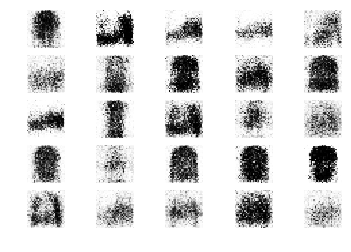

701 [D loss: 0.582460, acc.: 71.88%] [G loss: 1.097311]
702 [D loss: 0.540281, acc.: 79.69%] [G loss: 1.023818]
703 [D loss: 0.515217, acc.: 78.12%] [G loss: 1.077551]
704 [D loss: 0.660175, acc.: 54.69%] [G loss: 0.965867]
705 [D loss: 0.618908, acc.: 68.75%] [G loss: 0.957706]
706 [D loss: 0.621015, acc.: 62.50%] [G loss: 1.000821]
707 [D loss: 0.562887, acc.: 65.62%] [G loss: 1.126138]
708 [D loss: 0.583429, acc.: 75.00%] [G loss: 1.119649]
709 [D loss: 0.676537, acc.: 60.94%] [G loss: 1.035901]
710 [D loss: 0.588755, acc.: 73.44%] [G loss: 1.116893]
711 [D loss: 0.677620, acc.: 64.06%] [G loss: 1.073724]
712 [D loss: 0.511012, acc.: 78.12%] [G loss: 1.123354]
713 [D loss: 0.599721, acc.: 71.88%] [G loss: 1.087364]
714 [D loss: 0.620275, acc.: 65.62%] [G loss: 0.866908]
715 [D loss: 0.565891, acc.: 70.31%] [G loss: 1.008902]
716 [D loss: 0.634719, acc.: 64.06%] [G loss: 1.042929]
717 [D loss: 0.557400, acc.: 68.75%] [G loss: 1.120504]
718 [D loss: 0.585313, acc.: 68.75%] [G loss: 1.

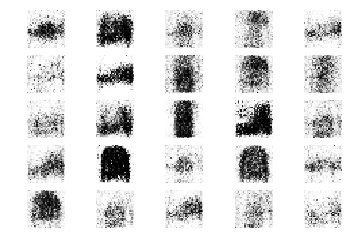

751 [D loss: 0.577678, acc.: 71.88%] [G loss: 1.022621]
752 [D loss: 0.597158, acc.: 65.62%] [G loss: 1.019543]
753 [D loss: 0.577201, acc.: 70.31%] [G loss: 1.028788]
754 [D loss: 0.563399, acc.: 70.31%] [G loss: 1.157324]
755 [D loss: 0.672477, acc.: 56.25%] [G loss: 1.066960]
756 [D loss: 0.599719, acc.: 62.50%] [G loss: 0.918477]
757 [D loss: 0.511128, acc.: 73.44%] [G loss: 1.035005]
758 [D loss: 0.554549, acc.: 70.31%] [G loss: 0.993740]
759 [D loss: 0.604111, acc.: 67.19%] [G loss: 1.028172]
760 [D loss: 0.570814, acc.: 70.31%] [G loss: 1.091878]
761 [D loss: 0.631775, acc.: 64.06%] [G loss: 1.053057]
762 [D loss: 0.566390, acc.: 64.06%] [G loss: 0.935390]
763 [D loss: 0.606740, acc.: 62.50%] [G loss: 1.042979]
764 [D loss: 0.607722, acc.: 70.31%] [G loss: 0.957229]
765 [D loss: 0.549735, acc.: 78.12%] [G loss: 1.191167]
766 [D loss: 0.564853, acc.: 70.31%] [G loss: 1.035177]
767 [D loss: 0.663103, acc.: 70.31%] [G loss: 0.999678]
768 [D loss: 0.602053, acc.: 71.88%] [G loss: 0.

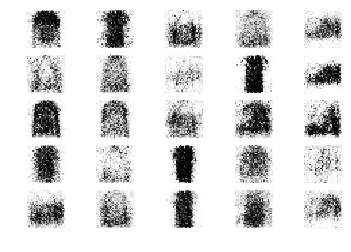

801 [D loss: 0.543920, acc.: 75.00%] [G loss: 1.104551]
802 [D loss: 0.618580, acc.: 62.50%] [G loss: 1.043914]
803 [D loss: 0.609123, acc.: 62.50%] [G loss: 1.012118]
804 [D loss: 0.538711, acc.: 79.69%] [G loss: 1.049385]
805 [D loss: 0.686712, acc.: 59.38%] [G loss: 1.109304]
806 [D loss: 0.613624, acc.: 68.75%] [G loss: 1.107283]
807 [D loss: 0.610086, acc.: 64.06%] [G loss: 1.042787]
808 [D loss: 0.608540, acc.: 68.75%] [G loss: 0.980646]
809 [D loss: 0.642290, acc.: 67.19%] [G loss: 0.986066]
810 [D loss: 0.589483, acc.: 68.75%] [G loss: 1.016416]
811 [D loss: 0.631600, acc.: 62.50%] [G loss: 1.065938]
812 [D loss: 0.595688, acc.: 67.19%] [G loss: 1.040665]
813 [D loss: 0.642995, acc.: 62.50%] [G loss: 1.008272]
814 [D loss: 0.684821, acc.: 57.81%] [G loss: 0.862281]
815 [D loss: 0.590477, acc.: 73.44%] [G loss: 1.096942]
816 [D loss: 0.619817, acc.: 60.94%] [G loss: 0.932068]
817 [D loss: 0.665489, acc.: 57.81%] [G loss: 0.934839]
818 [D loss: 0.612881, acc.: 62.50%] [G loss: 0.

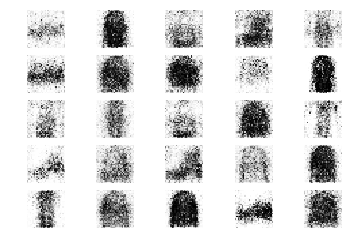

851 [D loss: 0.648407, acc.: 59.38%] [G loss: 1.027638]
852 [D loss: 0.588069, acc.: 64.06%] [G loss: 0.955973]
853 [D loss: 0.560927, acc.: 73.44%] [G loss: 1.041051]
854 [D loss: 0.570414, acc.: 76.56%] [G loss: 0.956833]
855 [D loss: 0.583478, acc.: 65.62%] [G loss: 0.984868]
856 [D loss: 0.533961, acc.: 76.56%] [G loss: 0.969084]
857 [D loss: 0.647620, acc.: 68.75%] [G loss: 1.057284]
858 [D loss: 0.514993, acc.: 79.69%] [G loss: 1.285638]
859 [D loss: 0.756512, acc.: 50.00%] [G loss: 1.061424]
860 [D loss: 0.608742, acc.: 68.75%] [G loss: 1.033307]
861 [D loss: 0.610926, acc.: 68.75%] [G loss: 1.001727]
862 [D loss: 0.594059, acc.: 70.31%] [G loss: 1.039651]
863 [D loss: 0.523249, acc.: 75.00%] [G loss: 0.931370]
864 [D loss: 0.598435, acc.: 64.06%] [G loss: 1.025058]
865 [D loss: 0.657251, acc.: 60.94%] [G loss: 1.046944]
866 [D loss: 0.557018, acc.: 75.00%] [G loss: 1.022525]
867 [D loss: 0.627286, acc.: 64.06%] [G loss: 0.999020]
868 [D loss: 0.545517, acc.: 79.69%] [G loss: 1.

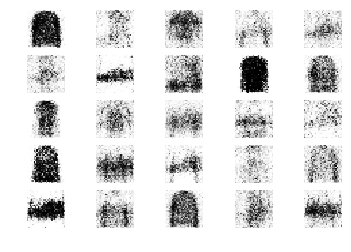

901 [D loss: 0.655458, acc.: 67.19%] [G loss: 0.934370]
902 [D loss: 0.542002, acc.: 79.69%] [G loss: 0.918777]
903 [D loss: 0.629375, acc.: 60.94%] [G loss: 0.991074]
904 [D loss: 0.612620, acc.: 60.94%] [G loss: 1.027628]
905 [D loss: 0.676786, acc.: 54.69%] [G loss: 1.002847]
906 [D loss: 0.618794, acc.: 62.50%] [G loss: 1.075245]
907 [D loss: 0.571206, acc.: 73.44%] [G loss: 1.054668]
908 [D loss: 0.623308, acc.: 67.19%] [G loss: 1.014777]
909 [D loss: 0.591460, acc.: 70.31%] [G loss: 0.953249]
910 [D loss: 0.599152, acc.: 68.75%] [G loss: 0.934269]
911 [D loss: 0.523647, acc.: 79.69%] [G loss: 0.918219]
912 [D loss: 0.606143, acc.: 65.62%] [G loss: 0.895679]
913 [D loss: 0.605943, acc.: 60.94%] [G loss: 0.838396]
914 [D loss: 0.666358, acc.: 62.50%] [G loss: 0.971031]
915 [D loss: 0.603853, acc.: 75.00%] [G loss: 1.011672]
916 [D loss: 0.635838, acc.: 64.06%] [G loss: 0.961240]
917 [D loss: 0.570378, acc.: 79.69%] [G loss: 0.924173]
918 [D loss: 0.637089, acc.: 59.38%] [G loss: 0.

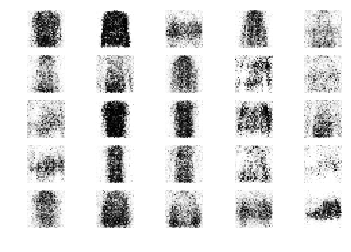

951 [D loss: 0.600163, acc.: 64.06%] [G loss: 1.077219]
952 [D loss: 0.600772, acc.: 68.75%] [G loss: 1.015072]
953 [D loss: 0.589565, acc.: 71.88%] [G loss: 1.035418]
954 [D loss: 0.624854, acc.: 65.62%] [G loss: 0.974343]
955 [D loss: 0.513225, acc.: 78.12%] [G loss: 1.045108]
956 [D loss: 0.602708, acc.: 67.19%] [G loss: 0.917200]
957 [D loss: 0.604407, acc.: 64.06%] [G loss: 0.944543]
958 [D loss: 0.620095, acc.: 64.06%] [G loss: 0.921533]
959 [D loss: 0.652221, acc.: 67.19%] [G loss: 1.068183]
960 [D loss: 0.622088, acc.: 64.06%] [G loss: 0.971682]
961 [D loss: 0.581961, acc.: 70.31%] [G loss: 0.925323]
962 [D loss: 0.590437, acc.: 70.31%] [G loss: 0.904539]
963 [D loss: 0.668742, acc.: 67.19%] [G loss: 0.976564]
964 [D loss: 0.599402, acc.: 67.19%] [G loss: 1.130444]
965 [D loss: 0.617059, acc.: 62.50%] [G loss: 1.057361]
966 [D loss: 0.646986, acc.: 65.62%] [G loss: 1.028715]
967 [D loss: 0.589606, acc.: 73.44%] [G loss: 1.008224]
968 [D loss: 0.621138, acc.: 67.19%] [G loss: 0.

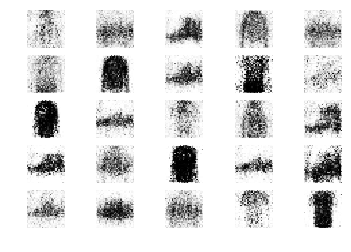

1001 [D loss: 0.578660, acc.: 71.88%] [G loss: 0.962860]
1002 [D loss: 0.633500, acc.: 60.94%] [G loss: 0.927070]
1003 [D loss: 0.595396, acc.: 64.06%] [G loss: 0.988604]
1004 [D loss: 0.683741, acc.: 57.81%] [G loss: 0.967244]
1005 [D loss: 0.622442, acc.: 60.94%] [G loss: 0.973125]
1006 [D loss: 0.624062, acc.: 60.94%] [G loss: 0.947992]
1007 [D loss: 0.633253, acc.: 62.50%] [G loss: 0.891412]
1008 [D loss: 0.642824, acc.: 62.50%] [G loss: 0.917455]
1009 [D loss: 0.597025, acc.: 65.62%] [G loss: 1.012197]
1010 [D loss: 0.566136, acc.: 67.19%] [G loss: 1.057894]
1011 [D loss: 0.612819, acc.: 62.50%] [G loss: 1.007146]
1012 [D loss: 0.596703, acc.: 70.31%] [G loss: 0.988557]
1013 [D loss: 0.615626, acc.: 65.62%] [G loss: 0.934127]
1014 [D loss: 0.663694, acc.: 57.81%] [G loss: 0.962961]
1015 [D loss: 0.548694, acc.: 75.00%] [G loss: 0.961152]
1016 [D loss: 0.643562, acc.: 65.62%] [G loss: 0.953135]
1017 [D loss: 0.573596, acc.: 67.19%] [G loss: 0.834570]
1018 [D loss: 0.579917, acc.: 7

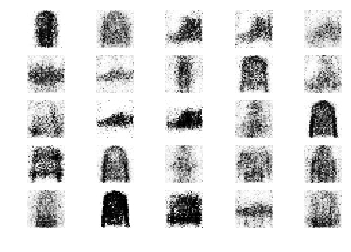

1051 [D loss: 0.635208, acc.: 60.94%] [G loss: 0.985397]
1052 [D loss: 0.581387, acc.: 71.88%] [G loss: 0.908952]
1053 [D loss: 0.638740, acc.: 64.06%] [G loss: 0.909754]
1054 [D loss: 0.592286, acc.: 68.75%] [G loss: 0.954378]
1055 [D loss: 0.602365, acc.: 73.44%] [G loss: 0.955072]
1056 [D loss: 0.637759, acc.: 68.75%] [G loss: 0.946635]
1057 [D loss: 0.634830, acc.: 67.19%] [G loss: 0.853585]
1058 [D loss: 0.624808, acc.: 64.06%] [G loss: 0.918681]
1059 [D loss: 0.617409, acc.: 64.06%] [G loss: 1.013248]
1060 [D loss: 0.580234, acc.: 70.31%] [G loss: 0.921471]
1061 [D loss: 0.620510, acc.: 68.75%] [G loss: 0.830749]
1062 [D loss: 0.604345, acc.: 65.62%] [G loss: 0.880202]
1063 [D loss: 0.683297, acc.: 54.69%] [G loss: 1.012028]
1064 [D loss: 0.589202, acc.: 65.62%] [G loss: 0.988166]
1065 [D loss: 0.678313, acc.: 54.69%] [G loss: 0.941979]
1066 [D loss: 0.598242, acc.: 67.19%] [G loss: 1.017593]
1067 [D loss: 0.632891, acc.: 64.06%] [G loss: 0.962734]
1068 [D loss: 0.587389, acc.: 6

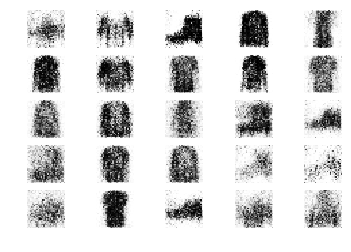

1101 [D loss: 0.587416, acc.: 71.88%] [G loss: 0.884366]
1102 [D loss: 0.676216, acc.: 60.94%] [G loss: 0.885792]
1103 [D loss: 0.656546, acc.: 59.38%] [G loss: 0.848843]
1104 [D loss: 0.593735, acc.: 71.88%] [G loss: 0.886388]
1105 [D loss: 0.595953, acc.: 59.38%] [G loss: 0.921505]
1106 [D loss: 0.576743, acc.: 70.31%] [G loss: 0.953418]
1107 [D loss: 0.627491, acc.: 65.62%] [G loss: 0.907191]
1108 [D loss: 0.658384, acc.: 75.00%] [G loss: 0.932141]
1109 [D loss: 0.632085, acc.: 64.06%] [G loss: 1.068629]
1110 [D loss: 0.620728, acc.: 62.50%] [G loss: 0.968544]
1111 [D loss: 0.671495, acc.: 60.94%] [G loss: 0.940032]
1112 [D loss: 0.609399, acc.: 67.19%] [G loss: 0.893786]
1113 [D loss: 0.613644, acc.: 68.75%] [G loss: 0.932627]
1114 [D loss: 0.576065, acc.: 70.31%] [G loss: 0.889889]
1115 [D loss: 0.544859, acc.: 76.56%] [G loss: 0.869641]
1116 [D loss: 0.641275, acc.: 67.19%] [G loss: 0.981897]
1117 [D loss: 0.652878, acc.: 59.38%] [G loss: 0.878504]
1118 [D loss: 0.621975, acc.: 6

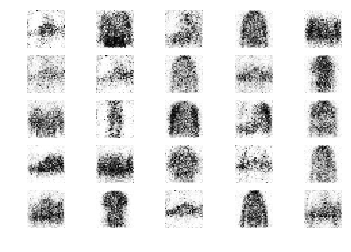

1151 [D loss: 0.599027, acc.: 71.88%] [G loss: 0.907319]
1152 [D loss: 0.593169, acc.: 71.88%] [G loss: 0.936817]
1153 [D loss: 0.616258, acc.: 62.50%] [G loss: 0.879824]
1154 [D loss: 0.612207, acc.: 60.94%] [G loss: 0.915509]
1155 [D loss: 0.616188, acc.: 57.81%] [G loss: 0.880368]
1156 [D loss: 0.663468, acc.: 62.50%] [G loss: 0.877229]
1157 [D loss: 0.599910, acc.: 65.62%] [G loss: 0.891206]
1158 [D loss: 0.661579, acc.: 64.06%] [G loss: 0.807816]
1159 [D loss: 0.667910, acc.: 59.38%] [G loss: 0.803971]
1160 [D loss: 0.626100, acc.: 64.06%] [G loss: 0.978569]
1161 [D loss: 0.543114, acc.: 75.00%] [G loss: 0.954428]
1162 [D loss: 0.560952, acc.: 73.44%] [G loss: 0.928018]
1163 [D loss: 0.565852, acc.: 73.44%] [G loss: 0.963539]
1164 [D loss: 0.648005, acc.: 56.25%] [G loss: 0.869616]
1165 [D loss: 0.669449, acc.: 60.94%] [G loss: 0.905947]
1166 [D loss: 0.685943, acc.: 56.25%] [G loss: 0.899505]
1167 [D loss: 0.629809, acc.: 54.69%] [G loss: 0.990036]
1168 [D loss: 0.596296, acc.: 6

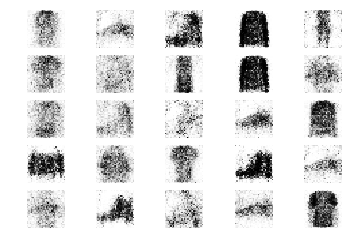

1201 [D loss: 0.603031, acc.: 75.00%] [G loss: 1.016256]
1202 [D loss: 0.593975, acc.: 64.06%] [G loss: 0.965292]
1203 [D loss: 0.580944, acc.: 70.31%] [G loss: 0.973038]
1204 [D loss: 0.601970, acc.: 67.19%] [G loss: 0.858203]
1205 [D loss: 0.642766, acc.: 64.06%] [G loss: 0.906780]
1206 [D loss: 0.598180, acc.: 64.06%] [G loss: 0.836430]
1207 [D loss: 0.653970, acc.: 67.19%] [G loss: 0.938472]
1208 [D loss: 0.632289, acc.: 68.75%] [G loss: 0.896892]
1209 [D loss: 0.640191, acc.: 65.62%] [G loss: 0.932323]
1210 [D loss: 0.604110, acc.: 65.62%] [G loss: 0.909623]
1211 [D loss: 0.628983, acc.: 65.62%] [G loss: 0.860988]
1212 [D loss: 0.545087, acc.: 73.44%] [G loss: 0.899666]
1213 [D loss: 0.630745, acc.: 70.31%] [G loss: 0.896627]
1214 [D loss: 0.600363, acc.: 64.06%] [G loss: 0.950141]
1215 [D loss: 0.578879, acc.: 73.44%] [G loss: 0.900790]
1216 [D loss: 0.662409, acc.: 59.38%] [G loss: 1.037827]
1217 [D loss: 0.645861, acc.: 54.69%] [G loss: 0.889415]
1218 [D loss: 0.630410, acc.: 6

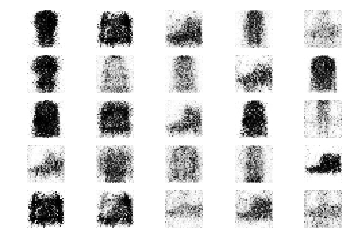

1251 [D loss: 0.632824, acc.: 65.62%] [G loss: 0.885420]
1252 [D loss: 0.685870, acc.: 56.25%] [G loss: 0.892394]
1253 [D loss: 0.632441, acc.: 60.94%] [G loss: 0.957060]
1254 [D loss: 0.702181, acc.: 45.31%] [G loss: 0.949522]
1255 [D loss: 0.590523, acc.: 68.75%] [G loss: 0.999813]
1256 [D loss: 0.692007, acc.: 51.56%] [G loss: 0.864231]
1257 [D loss: 0.581906, acc.: 76.56%] [G loss: 0.886969]
1258 [D loss: 0.595355, acc.: 62.50%] [G loss: 0.914727]
1259 [D loss: 0.671491, acc.: 57.81%] [G loss: 0.905401]
1260 [D loss: 0.580413, acc.: 68.75%] [G loss: 0.897499]
1261 [D loss: 0.660822, acc.: 54.69%] [G loss: 0.832753]
1262 [D loss: 0.626181, acc.: 68.75%] [G loss: 0.861979]
1263 [D loss: 0.602522, acc.: 68.75%] [G loss: 0.820437]
1264 [D loss: 0.590375, acc.: 71.88%] [G loss: 0.938651]
1265 [D loss: 0.607683, acc.: 70.31%] [G loss: 0.896906]
1266 [D loss: 0.617789, acc.: 70.31%] [G loss: 0.929630]
1267 [D loss: 0.645805, acc.: 64.06%] [G loss: 0.898174]
1268 [D loss: 0.640753, acc.: 6

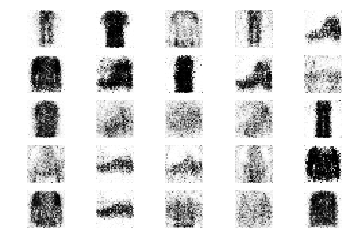

1301 [D loss: 0.602987, acc.: 70.31%] [G loss: 0.859216]
1302 [D loss: 0.564280, acc.: 70.31%] [G loss: 0.884134]
1303 [D loss: 0.617542, acc.: 65.62%] [G loss: 0.887053]
1304 [D loss: 0.657745, acc.: 62.50%] [G loss: 0.835033]
1305 [D loss: 0.636474, acc.: 62.50%] [G loss: 0.883062]
1306 [D loss: 0.571685, acc.: 73.44%] [G loss: 0.910209]
1307 [D loss: 0.628235, acc.: 67.19%] [G loss: 0.804855]
1308 [D loss: 0.609422, acc.: 67.19%] [G loss: 0.887219]
1309 [D loss: 0.637810, acc.: 60.94%] [G loss: 0.909626]
1310 [D loss: 0.602679, acc.: 75.00%] [G loss: 0.881011]
1311 [D loss: 0.545073, acc.: 75.00%] [G loss: 0.882837]
1312 [D loss: 0.653067, acc.: 57.81%] [G loss: 0.891523]
1313 [D loss: 0.604202, acc.: 68.75%] [G loss: 0.855792]
1314 [D loss: 0.643616, acc.: 68.75%] [G loss: 0.883611]
1315 [D loss: 0.643862, acc.: 60.94%] [G loss: 0.961457]
1316 [D loss: 0.559826, acc.: 67.19%] [G loss: 0.937538]
1317 [D loss: 0.699891, acc.: 65.62%] [G loss: 0.975158]
1318 [D loss: 0.615376, acc.: 7

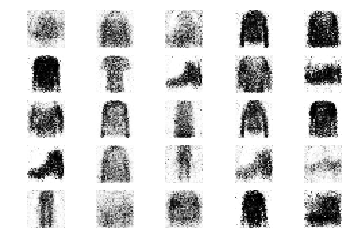

1351 [D loss: 0.639449, acc.: 67.19%] [G loss: 0.978544]
1352 [D loss: 0.569257, acc.: 73.44%] [G loss: 0.992616]
1353 [D loss: 0.643737, acc.: 62.50%] [G loss: 0.898393]
1354 [D loss: 0.650051, acc.: 54.69%] [G loss: 0.868903]
1355 [D loss: 0.624118, acc.: 60.94%] [G loss: 0.861131]
1356 [D loss: 0.687736, acc.: 54.69%] [G loss: 0.937030]
1357 [D loss: 0.593341, acc.: 71.88%] [G loss: 0.909710]
1358 [D loss: 0.633119, acc.: 67.19%] [G loss: 0.869222]
1359 [D loss: 0.618528, acc.: 70.31%] [G loss: 0.864094]
1360 [D loss: 0.658238, acc.: 57.81%] [G loss: 0.918276]
1361 [D loss: 0.562072, acc.: 79.69%] [G loss: 0.890935]
1362 [D loss: 0.595345, acc.: 70.31%] [G loss: 0.855983]
1363 [D loss: 0.692188, acc.: 54.69%] [G loss: 0.886828]
1364 [D loss: 0.599212, acc.: 67.19%] [G loss: 0.836625]
1365 [D loss: 0.592741, acc.: 75.00%] [G loss: 0.926001]
1366 [D loss: 0.591537, acc.: 67.19%] [G loss: 0.872784]
1367 [D loss: 0.548190, acc.: 78.12%] [G loss: 1.001901]
1368 [D loss: 0.559737, acc.: 7

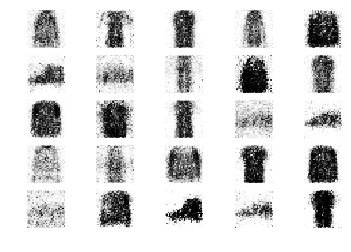

1401 [D loss: 0.647512, acc.: 62.50%] [G loss: 1.012514]
1402 [D loss: 0.635790, acc.: 64.06%] [G loss: 0.951248]
1403 [D loss: 0.586072, acc.: 65.62%] [G loss: 0.942443]
1404 [D loss: 0.596192, acc.: 76.56%] [G loss: 0.964770]
1405 [D loss: 0.612123, acc.: 65.62%] [G loss: 0.956081]
1406 [D loss: 0.622169, acc.: 67.19%] [G loss: 0.918167]
1407 [D loss: 0.600145, acc.: 67.19%] [G loss: 0.931796]
1408 [D loss: 0.547868, acc.: 75.00%] [G loss: 0.928944]
1409 [D loss: 0.653864, acc.: 65.62%] [G loss: 0.945306]
1410 [D loss: 0.626384, acc.: 56.25%] [G loss: 0.879764]
1411 [D loss: 0.613707, acc.: 68.75%] [G loss: 0.892099]
1412 [D loss: 0.599942, acc.: 71.88%] [G loss: 0.799071]
1413 [D loss: 0.584813, acc.: 71.88%] [G loss: 0.918061]
1414 [D loss: 0.630995, acc.: 64.06%] [G loss: 0.882723]
1415 [D loss: 0.611428, acc.: 64.06%] [G loss: 0.945587]
1416 [D loss: 0.595806, acc.: 71.88%] [G loss: 0.915961]
1417 [D loss: 0.582200, acc.: 62.50%] [G loss: 0.847382]
1418 [D loss: 0.623481, acc.: 6

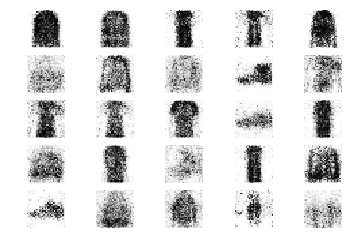

1451 [D loss: 0.558005, acc.: 73.44%] [G loss: 0.931102]
1452 [D loss: 0.622057, acc.: 65.62%] [G loss: 0.877768]
1453 [D loss: 0.572003, acc.: 64.06%] [G loss: 0.977388]
1454 [D loss: 0.642781, acc.: 71.88%] [G loss: 0.960281]
1455 [D loss: 0.702761, acc.: 50.00%] [G loss: 0.907745]
1456 [D loss: 0.680998, acc.: 59.38%] [G loss: 0.946297]
1457 [D loss: 0.627429, acc.: 59.38%] [G loss: 1.016173]
1458 [D loss: 0.565445, acc.: 70.31%] [G loss: 0.913092]
1459 [D loss: 0.642267, acc.: 64.06%] [G loss: 0.901626]
1460 [D loss: 0.669925, acc.: 53.12%] [G loss: 0.957068]
1461 [D loss: 0.572469, acc.: 76.56%] [G loss: 0.898081]
1462 [D loss: 0.600640, acc.: 75.00%] [G loss: 1.072097]
1463 [D loss: 0.652267, acc.: 67.19%] [G loss: 0.918742]
1464 [D loss: 0.640860, acc.: 65.62%] [G loss: 0.959746]
1465 [D loss: 0.560673, acc.: 73.44%] [G loss: 0.971121]
1466 [D loss: 0.654304, acc.: 62.50%] [G loss: 0.928639]
1467 [D loss: 0.580683, acc.: 73.44%] [G loss: 0.908853]
1468 [D loss: 0.684425, acc.: 5

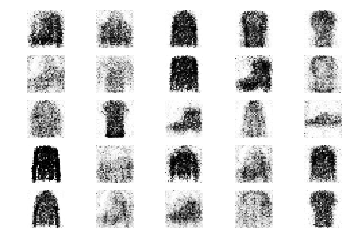

1501 [D loss: 0.626443, acc.: 59.38%] [G loss: 0.875707]
1502 [D loss: 0.613407, acc.: 64.06%] [G loss: 0.873150]
1503 [D loss: 0.612885, acc.: 68.75%] [G loss: 0.927988]
1504 [D loss: 0.600924, acc.: 68.75%] [G loss: 0.897177]
1505 [D loss: 0.628210, acc.: 65.62%] [G loss: 0.888456]
1506 [D loss: 0.659922, acc.: 67.19%] [G loss: 0.858260]
1507 [D loss: 0.507403, acc.: 79.69%] [G loss: 0.910197]
1508 [D loss: 0.596715, acc.: 71.88%] [G loss: 0.914182]
1509 [D loss: 0.636997, acc.: 71.88%] [G loss: 0.898417]
1510 [D loss: 0.579997, acc.: 70.31%] [G loss: 1.059299]
1511 [D loss: 0.656715, acc.: 60.94%] [G loss: 0.927642]
1512 [D loss: 0.540599, acc.: 79.69%] [G loss: 0.942114]
1513 [D loss: 0.622893, acc.: 62.50%] [G loss: 0.996070]
1514 [D loss: 0.605399, acc.: 67.19%] [G loss: 0.909912]
1515 [D loss: 0.603017, acc.: 65.62%] [G loss: 0.935859]
1516 [D loss: 0.534756, acc.: 75.00%] [G loss: 0.938060]
1517 [D loss: 0.583988, acc.: 67.19%] [G loss: 0.913851]
1518 [D loss: 0.662554, acc.: 5

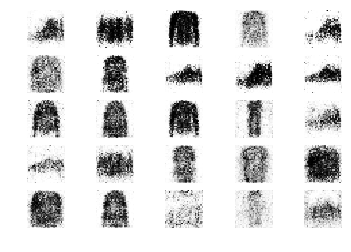

1551 [D loss: 0.570898, acc.: 68.75%] [G loss: 0.889008]
1552 [D loss: 0.635312, acc.: 65.62%] [G loss: 0.903552]
1553 [D loss: 0.528193, acc.: 79.69%] [G loss: 0.995010]
1554 [D loss: 0.606539, acc.: 67.19%] [G loss: 1.002301]
1555 [D loss: 0.594111, acc.: 70.31%] [G loss: 1.013093]
1556 [D loss: 0.625457, acc.: 65.62%] [G loss: 0.840853]
1557 [D loss: 0.620986, acc.: 62.50%] [G loss: 0.977174]
1558 [D loss: 0.577608, acc.: 73.44%] [G loss: 0.873617]
1559 [D loss: 0.602875, acc.: 67.19%] [G loss: 0.908195]
1560 [D loss: 0.590711, acc.: 70.31%] [G loss: 0.968767]
1561 [D loss: 0.625962, acc.: 62.50%] [G loss: 1.005134]
1562 [D loss: 0.532403, acc.: 75.00%] [G loss: 1.067119]
1563 [D loss: 0.635272, acc.: 62.50%] [G loss: 0.963760]
1564 [D loss: 0.642595, acc.: 67.19%] [G loss: 0.897005]
1565 [D loss: 0.615490, acc.: 73.44%] [G loss: 0.898901]
1566 [D loss: 0.649764, acc.: 60.94%] [G loss: 0.919965]
1567 [D loss: 0.609460, acc.: 64.06%] [G loss: 0.976696]
1568 [D loss: 0.574402, acc.: 7

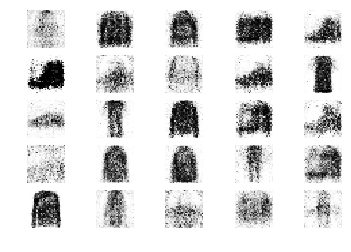

1601 [D loss: 0.601323, acc.: 67.19%] [G loss: 0.865258]
1602 [D loss: 0.606040, acc.: 59.38%] [G loss: 0.915451]
1603 [D loss: 0.574144, acc.: 68.75%] [G loss: 0.898958]
1604 [D loss: 0.553228, acc.: 75.00%] [G loss: 0.923249]
1605 [D loss: 0.682409, acc.: 59.38%] [G loss: 0.937309]
1606 [D loss: 0.708332, acc.: 59.38%] [G loss: 1.023932]
1607 [D loss: 0.643186, acc.: 59.38%] [G loss: 0.956287]
1608 [D loss: 0.595326, acc.: 70.31%] [G loss: 0.979526]
1609 [D loss: 0.658374, acc.: 59.38%] [G loss: 0.925162]
1610 [D loss: 0.610111, acc.: 67.19%] [G loss: 0.974365]
1611 [D loss: 0.650989, acc.: 60.94%] [G loss: 0.957223]
1612 [D loss: 0.618944, acc.: 68.75%] [G loss: 0.878646]
1613 [D loss: 0.580275, acc.: 70.31%] [G loss: 0.912452]
1614 [D loss: 0.642140, acc.: 62.50%] [G loss: 0.881709]
1615 [D loss: 0.629239, acc.: 60.94%] [G loss: 0.909393]
1616 [D loss: 0.638900, acc.: 65.62%] [G loss: 0.988522]
1617 [D loss: 0.677144, acc.: 59.38%] [G loss: 0.902225]
1618 [D loss: 0.652985, acc.: 6

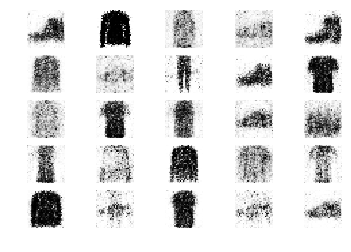

1651 [D loss: 0.557959, acc.: 75.00%] [G loss: 0.979745]
1652 [D loss: 0.582873, acc.: 64.06%] [G loss: 0.922999]
1653 [D loss: 0.585686, acc.: 70.31%] [G loss: 0.978376]
1654 [D loss: 0.548343, acc.: 78.12%] [G loss: 1.028145]
1655 [D loss: 0.614811, acc.: 60.94%] [G loss: 0.960822]
1656 [D loss: 0.586350, acc.: 68.75%] [G loss: 1.073614]
1657 [D loss: 0.692372, acc.: 56.25%] [G loss: 0.978095]
1658 [D loss: 0.626839, acc.: 62.50%] [G loss: 0.876323]
1659 [D loss: 0.642915, acc.: 65.62%] [G loss: 0.833251]
1660 [D loss: 0.666336, acc.: 62.50%] [G loss: 0.897767]
1661 [D loss: 0.552364, acc.: 81.25%] [G loss: 0.915876]
1662 [D loss: 0.586350, acc.: 65.62%] [G loss: 0.930341]
1663 [D loss: 0.672298, acc.: 54.69%] [G loss: 1.012481]
1664 [D loss: 0.640256, acc.: 70.31%] [G loss: 0.954042]
1665 [D loss: 0.578408, acc.: 71.88%] [G loss: 1.023403]
1666 [D loss: 0.559071, acc.: 71.88%] [G loss: 0.855223]
1667 [D loss: 0.650932, acc.: 59.38%] [G loss: 0.881714]
1668 [D loss: 0.654412, acc.: 5

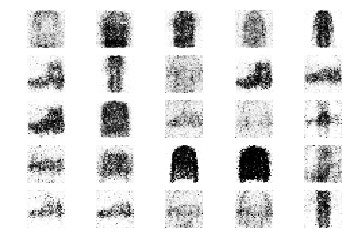

1701 [D loss: 0.613333, acc.: 53.12%] [G loss: 0.992345]
1702 [D loss: 0.674577, acc.: 60.94%] [G loss: 0.902009]
1703 [D loss: 0.583014, acc.: 70.31%] [G loss: 0.926695]
1704 [D loss: 0.634667, acc.: 67.19%] [G loss: 0.835052]
1705 [D loss: 0.658798, acc.: 60.94%] [G loss: 0.939608]
1706 [D loss: 0.625776, acc.: 67.19%] [G loss: 0.932617]
1707 [D loss: 0.630323, acc.: 68.75%] [G loss: 0.927227]
1708 [D loss: 0.615621, acc.: 68.75%] [G loss: 0.895196]
1709 [D loss: 0.599755, acc.: 71.88%] [G loss: 1.065596]
1710 [D loss: 0.642148, acc.: 60.94%] [G loss: 0.840246]
1711 [D loss: 0.578290, acc.: 70.31%] [G loss: 0.970385]
1712 [D loss: 0.639917, acc.: 57.81%] [G loss: 0.920098]
1713 [D loss: 0.605500, acc.: 64.06%] [G loss: 0.916977]
1714 [D loss: 0.673150, acc.: 50.00%] [G loss: 1.004259]
1715 [D loss: 0.660178, acc.: 53.12%] [G loss: 0.969033]
1716 [D loss: 0.563129, acc.: 68.75%] [G loss: 0.987930]
1717 [D loss: 0.676398, acc.: 62.50%] [G loss: 0.930997]
1718 [D loss: 0.621534, acc.: 5

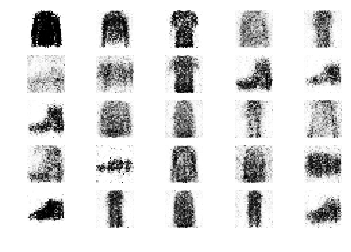

1751 [D loss: 0.609194, acc.: 67.19%] [G loss: 0.907474]
1752 [D loss: 0.571984, acc.: 68.75%] [G loss: 0.896059]
1753 [D loss: 0.628089, acc.: 64.06%] [G loss: 0.907565]
1754 [D loss: 0.626528, acc.: 64.06%] [G loss: 1.000219]
1755 [D loss: 0.613201, acc.: 65.62%] [G loss: 0.911399]
1756 [D loss: 0.593168, acc.: 65.62%] [G loss: 0.954216]
1757 [D loss: 0.638656, acc.: 56.25%] [G loss: 0.922756]
1758 [D loss: 0.659139, acc.: 59.38%] [G loss: 1.031533]
1759 [D loss: 0.639422, acc.: 65.62%] [G loss: 0.891498]
1760 [D loss: 0.574366, acc.: 75.00%] [G loss: 0.950561]
1761 [D loss: 0.608072, acc.: 68.75%] [G loss: 0.916318]
1762 [D loss: 0.617525, acc.: 65.62%] [G loss: 0.941520]
1763 [D loss: 0.559886, acc.: 75.00%] [G loss: 0.968574]
1764 [D loss: 0.683240, acc.: 56.25%] [G loss: 1.031947]
1765 [D loss: 0.615385, acc.: 64.06%] [G loss: 1.051348]
1766 [D loss: 0.622840, acc.: 60.94%] [G loss: 0.991353]
1767 [D loss: 0.564014, acc.: 81.25%] [G loss: 0.928811]
1768 [D loss: 0.595982, acc.: 6

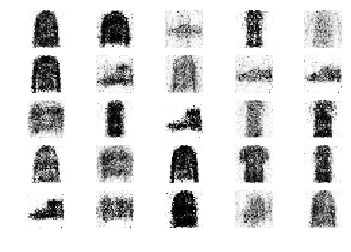

1801 [D loss: 0.598625, acc.: 65.62%] [G loss: 0.950364]
1802 [D loss: 0.552501, acc.: 73.44%] [G loss: 1.024776]
1803 [D loss: 0.601930, acc.: 64.06%] [G loss: 0.899506]
1804 [D loss: 0.598906, acc.: 64.06%] [G loss: 0.810377]
1805 [D loss: 0.553706, acc.: 75.00%] [G loss: 0.901157]
1806 [D loss: 0.544048, acc.: 71.88%] [G loss: 0.974634]
1807 [D loss: 0.594816, acc.: 67.19%] [G loss: 1.063250]
1808 [D loss: 0.647837, acc.: 62.50%] [G loss: 1.094017]
1809 [D loss: 0.608978, acc.: 59.38%] [G loss: 1.071101]
1810 [D loss: 0.577715, acc.: 75.00%] [G loss: 1.066266]
1811 [D loss: 0.630947, acc.: 57.81%] [G loss: 1.136250]
1812 [D loss: 0.601343, acc.: 64.06%] [G loss: 1.012124]
1813 [D loss: 0.597245, acc.: 60.94%] [G loss: 0.930435]
1814 [D loss: 0.599190, acc.: 70.31%] [G loss: 0.912653]
1815 [D loss: 0.688741, acc.: 53.12%] [G loss: 0.982552]
1816 [D loss: 0.608762, acc.: 65.62%] [G loss: 0.881680]
1817 [D loss: 0.596199, acc.: 59.38%] [G loss: 1.042414]
1818 [D loss: 0.640254, acc.: 6

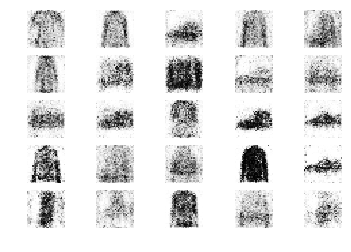

1851 [D loss: 0.654189, acc.: 67.19%] [G loss: 0.844550]
1852 [D loss: 0.631901, acc.: 64.06%] [G loss: 0.887108]
1853 [D loss: 0.586875, acc.: 67.19%] [G loss: 0.853489]
1854 [D loss: 0.644688, acc.: 71.88%] [G loss: 0.812849]
1855 [D loss: 0.608633, acc.: 65.62%] [G loss: 0.976980]
1856 [D loss: 0.544267, acc.: 76.56%] [G loss: 0.946590]
1857 [D loss: 0.629388, acc.: 68.75%] [G loss: 1.051313]
1858 [D loss: 0.572463, acc.: 75.00%] [G loss: 0.833725]
1859 [D loss: 0.615787, acc.: 68.75%] [G loss: 0.887154]
1860 [D loss: 0.558335, acc.: 75.00%] [G loss: 0.930372]
1861 [D loss: 0.592914, acc.: 65.62%] [G loss: 0.928784]
1862 [D loss: 0.616361, acc.: 59.38%] [G loss: 1.035297]
1863 [D loss: 0.683533, acc.: 62.50%] [G loss: 1.001371]
1864 [D loss: 0.633352, acc.: 60.94%] [G loss: 0.982705]
1865 [D loss: 0.671627, acc.: 57.81%] [G loss: 0.947023]
1866 [D loss: 0.697603, acc.: 51.56%] [G loss: 0.992993]
1867 [D loss: 0.626678, acc.: 62.50%] [G loss: 0.990061]
1868 [D loss: 0.648137, acc.: 5

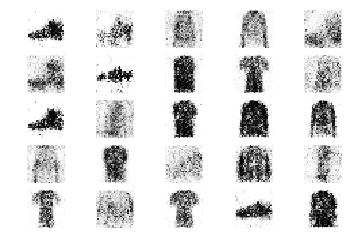

1901 [D loss: 0.606687, acc.: 62.50%] [G loss: 0.977903]
1902 [D loss: 0.592896, acc.: 65.62%] [G loss: 1.029824]
1903 [D loss: 0.652357, acc.: 60.94%] [G loss: 0.982082]
1904 [D loss: 0.589962, acc.: 65.62%] [G loss: 0.869976]
1905 [D loss: 0.658232, acc.: 60.94%] [G loss: 1.006425]
1906 [D loss: 0.596909, acc.: 68.75%] [G loss: 0.936707]
1907 [D loss: 0.618203, acc.: 64.06%] [G loss: 0.971003]
1908 [D loss: 0.633432, acc.: 57.81%] [G loss: 0.927512]
1909 [D loss: 0.692569, acc.: 56.25%] [G loss: 0.899821]
1910 [D loss: 0.536648, acc.: 70.31%] [G loss: 1.017233]
1911 [D loss: 0.527679, acc.: 71.88%] [G loss: 0.892226]
1912 [D loss: 0.630096, acc.: 59.38%] [G loss: 0.992191]
1913 [D loss: 0.571280, acc.: 67.19%] [G loss: 1.038704]
1914 [D loss: 0.581643, acc.: 65.62%] [G loss: 0.936967]
1915 [D loss: 0.655572, acc.: 59.38%] [G loss: 0.940092]
1916 [D loss: 0.635152, acc.: 62.50%] [G loss: 0.822316]
1917 [D loss: 0.599522, acc.: 70.31%] [G loss: 0.924548]
1918 [D loss: 0.649256, acc.: 5

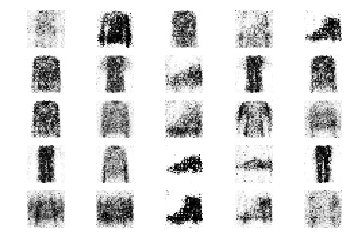

1951 [D loss: 0.590013, acc.: 62.50%] [G loss: 0.833266]
1952 [D loss: 0.618753, acc.: 68.75%] [G loss: 0.977098]
1953 [D loss: 0.593899, acc.: 67.19%] [G loss: 0.929570]
1954 [D loss: 0.615790, acc.: 65.62%] [G loss: 0.948445]
1955 [D loss: 0.635963, acc.: 59.38%] [G loss: 0.941939]
1956 [D loss: 0.606229, acc.: 67.19%] [G loss: 0.969064]
1957 [D loss: 0.576228, acc.: 68.75%] [G loss: 0.934453]
1958 [D loss: 0.558353, acc.: 75.00%] [G loss: 0.918137]
1959 [D loss: 0.581629, acc.: 71.88%] [G loss: 0.935813]
1960 [D loss: 0.529271, acc.: 75.00%] [G loss: 0.966320]
1961 [D loss: 0.557077, acc.: 73.44%] [G loss: 0.927591]
1962 [D loss: 0.520919, acc.: 76.56%] [G loss: 0.881769]
1963 [D loss: 0.671438, acc.: 51.56%] [G loss: 0.878566]
1964 [D loss: 0.659103, acc.: 71.88%] [G loss: 0.924561]
1965 [D loss: 0.667165, acc.: 62.50%] [G loss: 0.985848]
1966 [D loss: 0.581278, acc.: 75.00%] [G loss: 0.895977]
1967 [D loss: 0.606983, acc.: 62.50%] [G loss: 1.140507]
1968 [D loss: 0.630303, acc.: 6

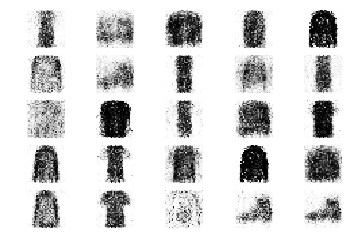

2001 [D loss: 0.590118, acc.: 71.88%] [G loss: 0.963586]
2002 [D loss: 0.596578, acc.: 65.62%] [G loss: 0.936996]
2003 [D loss: 0.659515, acc.: 59.38%] [G loss: 0.995929]
2004 [D loss: 0.569595, acc.: 73.44%] [G loss: 0.981572]
2005 [D loss: 0.645432, acc.: 64.06%] [G loss: 0.881222]
2006 [D loss: 0.623537, acc.: 62.50%] [G loss: 0.989558]
2007 [D loss: 0.563857, acc.: 67.19%] [G loss: 0.924150]
2008 [D loss: 0.660903, acc.: 57.81%] [G loss: 0.955196]
2009 [D loss: 0.605629, acc.: 64.06%] [G loss: 0.920481]
2010 [D loss: 0.570274, acc.: 71.88%] [G loss: 1.007619]
2011 [D loss: 0.610803, acc.: 65.62%] [G loss: 0.991972]
2012 [D loss: 0.576290, acc.: 73.44%] [G loss: 0.852960]
2013 [D loss: 0.644898, acc.: 56.25%] [G loss: 0.944512]
2014 [D loss: 0.623997, acc.: 64.06%] [G loss: 0.844375]
2015 [D loss: 0.632281, acc.: 62.50%] [G loss: 0.946183]
2016 [D loss: 0.599016, acc.: 64.06%] [G loss: 0.975909]
2017 [D loss: 0.583369, acc.: 67.19%] [G loss: 1.104016]
2018 [D loss: 0.613884, acc.: 6

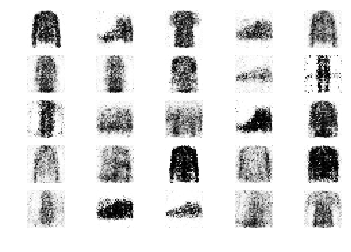

2051 [D loss: 0.561650, acc.: 75.00%] [G loss: 0.931567]
2052 [D loss: 0.584593, acc.: 67.19%] [G loss: 0.928881]
2053 [D loss: 0.603523, acc.: 67.19%] [G loss: 0.923489]
2054 [D loss: 0.518527, acc.: 82.81%] [G loss: 0.918187]
2055 [D loss: 0.575398, acc.: 71.88%] [G loss: 0.931225]
2056 [D loss: 0.597537, acc.: 62.50%] [G loss: 0.851670]
2057 [D loss: 0.624072, acc.: 65.62%] [G loss: 0.915669]
2058 [D loss: 0.563152, acc.: 73.44%] [G loss: 0.954102]
2059 [D loss: 0.632397, acc.: 65.62%] [G loss: 0.964235]
2060 [D loss: 0.627646, acc.: 62.50%] [G loss: 0.909854]
2061 [D loss: 0.605206, acc.: 70.31%] [G loss: 1.050164]
2062 [D loss: 0.692375, acc.: 48.44%] [G loss: 0.955275]
2063 [D loss: 0.574327, acc.: 75.00%] [G loss: 1.029138]
2064 [D loss: 0.621651, acc.: 65.62%] [G loss: 0.955861]
2065 [D loss: 0.708631, acc.: 48.44%] [G loss: 1.075492]
2066 [D loss: 0.659987, acc.: 64.06%] [G loss: 0.897994]
2067 [D loss: 0.625156, acc.: 60.94%] [G loss: 1.080412]
2068 [D loss: 0.612017, acc.: 6

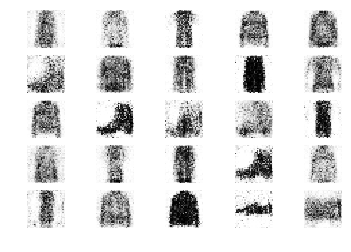

2101 [D loss: 0.602124, acc.: 76.56%] [G loss: 1.011832]
2102 [D loss: 0.603864, acc.: 65.62%] [G loss: 0.909884]
2103 [D loss: 0.648565, acc.: 59.38%] [G loss: 0.885517]
2104 [D loss: 0.583797, acc.: 67.19%] [G loss: 0.913897]
2105 [D loss: 0.567171, acc.: 73.44%] [G loss: 1.045877]
2106 [D loss: 0.531895, acc.: 76.56%] [G loss: 1.053770]
2107 [D loss: 0.712538, acc.: 62.50%] [G loss: 0.939566]
2108 [D loss: 0.572066, acc.: 73.44%] [G loss: 0.855772]
2109 [D loss: 0.617375, acc.: 64.06%] [G loss: 0.920634]
2110 [D loss: 0.598864, acc.: 67.19%] [G loss: 0.895706]
2111 [D loss: 0.626680, acc.: 70.31%] [G loss: 0.943033]
2112 [D loss: 0.615538, acc.: 64.06%] [G loss: 0.872299]
2113 [D loss: 0.583658, acc.: 62.50%] [G loss: 0.996188]
2114 [D loss: 0.657670, acc.: 57.81%] [G loss: 1.062681]
2115 [D loss: 0.665157, acc.: 59.38%] [G loss: 1.037876]
2116 [D loss: 0.598839, acc.: 67.19%] [G loss: 1.038707]
2117 [D loss: 0.548408, acc.: 79.69%] [G loss: 0.990149]
2118 [D loss: 0.555446, acc.: 7

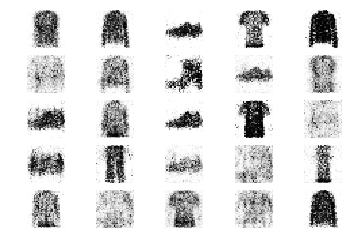

2151 [D loss: 0.606945, acc.: 71.88%] [G loss: 1.062859]
2152 [D loss: 0.665983, acc.: 60.94%] [G loss: 0.948658]
2153 [D loss: 0.649411, acc.: 59.38%] [G loss: 0.917605]
2154 [D loss: 0.590942, acc.: 70.31%] [G loss: 1.022123]
2155 [D loss: 0.598287, acc.: 62.50%] [G loss: 0.885086]
2156 [D loss: 0.619595, acc.: 62.50%] [G loss: 1.028914]
2157 [D loss: 0.600092, acc.: 68.75%] [G loss: 0.917057]
2158 [D loss: 0.602019, acc.: 68.75%] [G loss: 0.980578]
2159 [D loss: 0.634286, acc.: 71.88%] [G loss: 0.964435]
2160 [D loss: 0.614528, acc.: 71.88%] [G loss: 0.895477]
2161 [D loss: 0.544287, acc.: 76.56%] [G loss: 0.943489]
2162 [D loss: 0.549768, acc.: 73.44%] [G loss: 0.917670]
2163 [D loss: 0.542048, acc.: 73.44%] [G loss: 1.039270]
2164 [D loss: 0.592559, acc.: 68.75%] [G loss: 0.981867]
2165 [D loss: 0.532983, acc.: 70.31%] [G loss: 1.027262]
2166 [D loss: 0.689788, acc.: 62.50%] [G loss: 0.975820]
2167 [D loss: 0.672559, acc.: 67.19%] [G loss: 0.971571]
2168 [D loss: 0.563679, acc.: 7

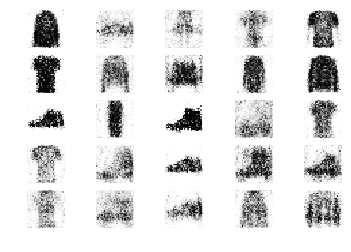

2201 [D loss: 0.635666, acc.: 62.50%] [G loss: 0.915873]
2202 [D loss: 0.575084, acc.: 62.50%] [G loss: 0.871133]
2203 [D loss: 0.616709, acc.: 59.38%] [G loss: 0.980343]
2204 [D loss: 0.647593, acc.: 64.06%] [G loss: 0.925599]
2205 [D loss: 0.617452, acc.: 56.25%] [G loss: 0.938340]
2206 [D loss: 0.613258, acc.: 59.38%] [G loss: 1.052065]
2207 [D loss: 0.667051, acc.: 65.62%] [G loss: 0.887960]
2208 [D loss: 0.592436, acc.: 73.44%] [G loss: 0.960730]
2209 [D loss: 0.639566, acc.: 59.38%] [G loss: 0.974335]
2210 [D loss: 0.672847, acc.: 53.12%] [G loss: 0.867116]
2211 [D loss: 0.696416, acc.: 57.81%] [G loss: 0.883294]
2212 [D loss: 0.670792, acc.: 51.56%] [G loss: 0.914885]
2213 [D loss: 0.538987, acc.: 75.00%] [G loss: 0.971418]
2214 [D loss: 0.603391, acc.: 62.50%] [G loss: 0.996027]
2215 [D loss: 0.649894, acc.: 56.25%] [G loss: 1.002650]
2216 [D loss: 0.661863, acc.: 59.38%] [G loss: 0.986567]
2217 [D loss: 0.610793, acc.: 64.06%] [G loss: 0.943477]
2218 [D loss: 0.582185, acc.: 7

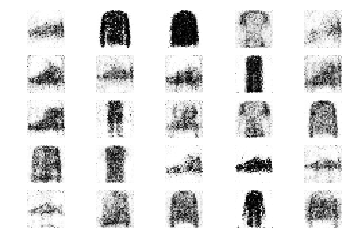

2251 [D loss: 0.648041, acc.: 59.38%] [G loss: 0.973728]
2252 [D loss: 0.623118, acc.: 60.94%] [G loss: 0.932984]
2253 [D loss: 0.607307, acc.: 70.31%] [G loss: 0.940392]
2254 [D loss: 0.582711, acc.: 70.31%] [G loss: 1.026449]
2255 [D loss: 0.668959, acc.: 60.94%] [G loss: 0.915458]
2256 [D loss: 0.654586, acc.: 64.06%] [G loss: 0.955389]
2257 [D loss: 0.631535, acc.: 59.38%] [G loss: 0.955778]
2258 [D loss: 0.582967, acc.: 73.44%] [G loss: 0.833410]
2259 [D loss: 0.571954, acc.: 73.44%] [G loss: 0.914942]
2260 [D loss: 0.579942, acc.: 68.75%] [G loss: 0.944922]
2261 [D loss: 0.681506, acc.: 59.38%] [G loss: 0.792366]
2262 [D loss: 0.558986, acc.: 67.19%] [G loss: 1.040772]
2263 [D loss: 0.647135, acc.: 60.94%] [G loss: 1.019622]
2264 [D loss: 0.646151, acc.: 53.12%] [G loss: 1.026470]
2265 [D loss: 0.636294, acc.: 71.88%] [G loss: 1.080507]
2266 [D loss: 0.621959, acc.: 60.94%] [G loss: 1.055091]
2267 [D loss: 0.589437, acc.: 65.62%] [G loss: 0.947362]
2268 [D loss: 0.580358, acc.: 7

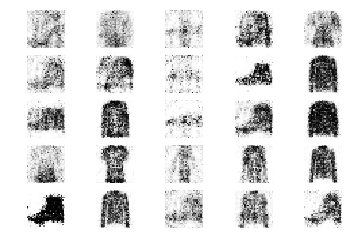

2301 [D loss: 0.604739, acc.: 65.62%] [G loss: 0.854935]
2302 [D loss: 0.629721, acc.: 65.62%] [G loss: 0.911333]
2303 [D loss: 0.619442, acc.: 62.50%] [G loss: 0.998126]
2304 [D loss: 0.601940, acc.: 64.06%] [G loss: 0.954377]
2305 [D loss: 0.622012, acc.: 67.19%] [G loss: 0.938391]
2306 [D loss: 0.683676, acc.: 50.00%] [G loss: 0.919040]
2307 [D loss: 0.638245, acc.: 64.06%] [G loss: 0.980677]
2308 [D loss: 0.628264, acc.: 64.06%] [G loss: 0.963834]
2309 [D loss: 0.615209, acc.: 60.94%] [G loss: 0.958920]
2310 [D loss: 0.611878, acc.: 67.19%] [G loss: 0.970450]
2311 [D loss: 0.614796, acc.: 62.50%] [G loss: 0.940585]
2312 [D loss: 0.561080, acc.: 70.31%] [G loss: 1.053524]
2313 [D loss: 0.670903, acc.: 57.81%] [G loss: 0.809715]
2314 [D loss: 0.676209, acc.: 53.12%] [G loss: 0.907744]
2315 [D loss: 0.608881, acc.: 70.31%] [G loss: 0.927259]
2316 [D loss: 0.644106, acc.: 59.38%] [G loss: 0.943662]
2317 [D loss: 0.613921, acc.: 59.38%] [G loss: 1.072444]
2318 [D loss: 0.601645, acc.: 7

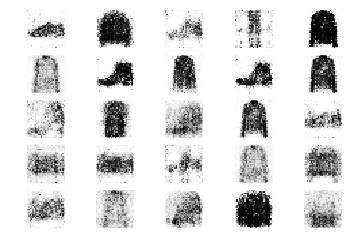

2351 [D loss: 0.654220, acc.: 57.81%] [G loss: 0.963039]
2352 [D loss: 0.587512, acc.: 65.62%] [G loss: 1.006893]
2353 [D loss: 0.562209, acc.: 71.88%] [G loss: 0.935199]
2354 [D loss: 0.637029, acc.: 64.06%] [G loss: 0.947218]
2355 [D loss: 0.637740, acc.: 68.75%] [G loss: 1.036534]
2356 [D loss: 0.574708, acc.: 67.19%] [G loss: 0.954053]
2357 [D loss: 0.561058, acc.: 68.75%] [G loss: 1.051900]
2358 [D loss: 0.672386, acc.: 65.62%] [G loss: 1.003708]
2359 [D loss: 0.593565, acc.: 65.62%] [G loss: 1.033625]
2360 [D loss: 0.658145, acc.: 57.81%] [G loss: 1.052588]
2361 [D loss: 0.609742, acc.: 60.94%] [G loss: 0.966564]
2362 [D loss: 0.607201, acc.: 62.50%] [G loss: 1.084439]
2363 [D loss: 0.677268, acc.: 54.69%] [G loss: 0.994066]
2364 [D loss: 0.599893, acc.: 68.75%] [G loss: 0.990579]
2365 [D loss: 0.576029, acc.: 67.19%] [G loss: 0.986648]
2366 [D loss: 0.659989, acc.: 51.56%] [G loss: 0.975509]
2367 [D loss: 0.622220, acc.: 62.50%] [G loss: 0.951369]
2368 [D loss: 0.579679, acc.: 7

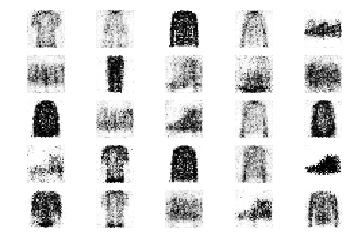

2401 [D loss: 0.633253, acc.: 59.38%] [G loss: 0.953478]
2402 [D loss: 0.623984, acc.: 64.06%] [G loss: 1.066261]
2403 [D loss: 0.583146, acc.: 65.62%] [G loss: 0.976130]
2404 [D loss: 0.624219, acc.: 67.19%] [G loss: 0.982939]
2405 [D loss: 0.664162, acc.: 54.69%] [G loss: 0.950057]
2406 [D loss: 0.643184, acc.: 64.06%] [G loss: 0.915489]
2407 [D loss: 0.550524, acc.: 75.00%] [G loss: 0.939102]
2408 [D loss: 0.586061, acc.: 71.88%] [G loss: 0.920478]
2409 [D loss: 0.571764, acc.: 68.75%] [G loss: 0.996964]
2410 [D loss: 0.597970, acc.: 68.75%] [G loss: 0.885441]
2411 [D loss: 0.539382, acc.: 75.00%] [G loss: 1.052087]
2412 [D loss: 0.571319, acc.: 76.56%] [G loss: 0.909463]
2413 [D loss: 0.537427, acc.: 71.88%] [G loss: 1.073280]
2414 [D loss: 0.619065, acc.: 64.06%] [G loss: 0.872195]
2415 [D loss: 0.629922, acc.: 65.62%] [G loss: 0.936398]
2416 [D loss: 0.612627, acc.: 68.75%] [G loss: 1.009801]
2417 [D loss: 0.624609, acc.: 65.62%] [G loss: 0.944081]
2418 [D loss: 0.561073, acc.: 7

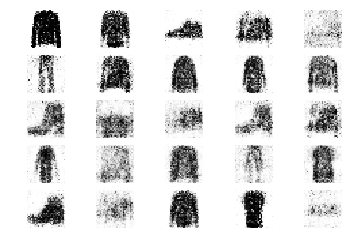

2451 [D loss: 0.654481, acc.: 59.38%] [G loss: 1.012321]
2452 [D loss: 0.640559, acc.: 56.25%] [G loss: 1.012729]
2453 [D loss: 0.507770, acc.: 85.94%] [G loss: 1.003519]
2454 [D loss: 0.655929, acc.: 57.81%] [G loss: 0.974430]
2455 [D loss: 0.563742, acc.: 78.12%] [G loss: 0.935689]
2456 [D loss: 0.610529, acc.: 68.75%] [G loss: 0.900274]
2457 [D loss: 0.619162, acc.: 65.62%] [G loss: 0.907172]
2458 [D loss: 0.585806, acc.: 68.75%] [G loss: 0.977767]
2459 [D loss: 0.570899, acc.: 64.06%] [G loss: 1.012464]
2460 [D loss: 0.624876, acc.: 60.94%] [G loss: 0.953550]
2461 [D loss: 0.725651, acc.: 53.12%] [G loss: 1.007905]
2462 [D loss: 0.673342, acc.: 59.38%] [G loss: 1.050187]
2463 [D loss: 0.635288, acc.: 65.62%] [G loss: 0.997534]
2464 [D loss: 0.613374, acc.: 67.19%] [G loss: 1.074876]
2465 [D loss: 0.583609, acc.: 71.88%] [G loss: 0.976950]
2466 [D loss: 0.673672, acc.: 60.94%] [G loss: 0.904805]
2467 [D loss: 0.636305, acc.: 62.50%] [G loss: 0.962832]
2468 [D loss: 0.597381, acc.: 6

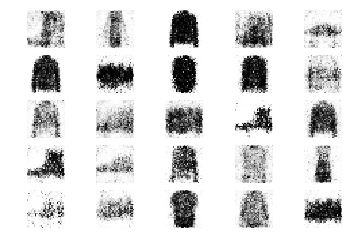

2501 [D loss: 0.608294, acc.: 65.62%] [G loss: 0.864453]
2502 [D loss: 0.626727, acc.: 57.81%] [G loss: 0.909866]
2503 [D loss: 0.599988, acc.: 67.19%] [G loss: 0.941162]
2504 [D loss: 0.615345, acc.: 65.62%] [G loss: 0.894621]
2505 [D loss: 0.590951, acc.: 73.44%] [G loss: 0.839486]
2506 [D loss: 0.594440, acc.: 70.31%] [G loss: 0.878494]
2507 [D loss: 0.615175, acc.: 73.44%] [G loss: 0.900404]
2508 [D loss: 0.703562, acc.: 54.69%] [G loss: 0.947926]
2509 [D loss: 0.604257, acc.: 68.75%] [G loss: 1.013480]
2510 [D loss: 0.603603, acc.: 71.88%] [G loss: 0.914552]
2511 [D loss: 0.578426, acc.: 71.88%] [G loss: 0.934424]
2512 [D loss: 0.559524, acc.: 75.00%] [G loss: 0.900168]
2513 [D loss: 0.603412, acc.: 64.06%] [G loss: 1.002600]
2514 [D loss: 0.672670, acc.: 53.12%] [G loss: 1.037087]
2515 [D loss: 0.749036, acc.: 51.56%] [G loss: 0.993981]
2516 [D loss: 0.592789, acc.: 71.88%] [G loss: 1.080302]
2517 [D loss: 0.516438, acc.: 76.56%] [G loss: 0.986294]
2518 [D loss: 0.567349, acc.: 7

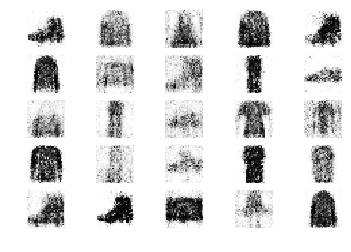

2551 [D loss: 0.566810, acc.: 75.00%] [G loss: 0.913697]
2552 [D loss: 0.593523, acc.: 70.31%] [G loss: 0.966592]
2553 [D loss: 0.556049, acc.: 68.75%] [G loss: 1.060260]
2554 [D loss: 0.633977, acc.: 64.06%] [G loss: 1.024988]
2555 [D loss: 0.584660, acc.: 67.19%] [G loss: 0.972633]
2556 [D loss: 0.608278, acc.: 70.31%] [G loss: 1.024472]
2557 [D loss: 0.675019, acc.: 57.81%] [G loss: 0.876960]
2558 [D loss: 0.606253, acc.: 75.00%] [G loss: 0.976335]
2559 [D loss: 0.657789, acc.: 64.06%] [G loss: 0.960610]
2560 [D loss: 0.607341, acc.: 67.19%] [G loss: 0.921532]
2561 [D loss: 0.587531, acc.: 71.88%] [G loss: 0.908545]
2562 [D loss: 0.583564, acc.: 67.19%] [G loss: 0.835765]
2563 [D loss: 0.690705, acc.: 57.81%] [G loss: 0.855481]
2564 [D loss: 0.552381, acc.: 75.00%] [G loss: 0.950632]
2565 [D loss: 0.598969, acc.: 71.88%] [G loss: 0.975506]
2566 [D loss: 0.610659, acc.: 68.75%] [G loss: 0.890837]
2567 [D loss: 0.673094, acc.: 54.69%] [G loss: 1.006966]
2568 [D loss: 0.601796, acc.: 6

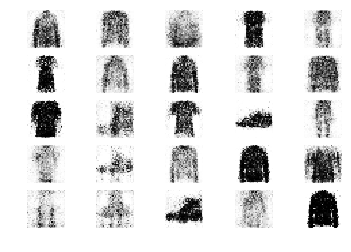

2601 [D loss: 0.613927, acc.: 68.75%] [G loss: 0.939881]
2602 [D loss: 0.662975, acc.: 59.38%] [G loss: 0.831422]
2603 [D loss: 0.625448, acc.: 62.50%] [G loss: 0.962586]
2604 [D loss: 0.598346, acc.: 60.94%] [G loss: 0.904866]
2605 [D loss: 0.582952, acc.: 70.31%] [G loss: 0.840837]
2606 [D loss: 0.563835, acc.: 76.56%] [G loss: 0.909024]
2607 [D loss: 0.661214, acc.: 59.38%] [G loss: 0.889201]
2608 [D loss: 0.595849, acc.: 64.06%] [G loss: 0.981653]
2609 [D loss: 0.606094, acc.: 64.06%] [G loss: 0.995073]
2610 [D loss: 0.595397, acc.: 70.31%] [G loss: 0.987367]
2611 [D loss: 0.618616, acc.: 70.31%] [G loss: 0.972084]
2612 [D loss: 0.683536, acc.: 62.50%] [G loss: 0.955820]
2613 [D loss: 0.685082, acc.: 57.81%] [G loss: 0.977519]
2614 [D loss: 0.617260, acc.: 60.94%] [G loss: 1.087907]
2615 [D loss: 0.618980, acc.: 64.06%] [G loss: 1.035303]
2616 [D loss: 0.578976, acc.: 73.44%] [G loss: 0.982397]
2617 [D loss: 0.602276, acc.: 70.31%] [G loss: 0.989300]
2618 [D loss: 0.638290, acc.: 5

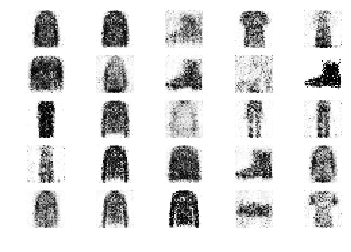

2651 [D loss: 0.615716, acc.: 65.62%] [G loss: 0.925398]
2652 [D loss: 0.618317, acc.: 68.75%] [G loss: 0.984077]
2653 [D loss: 0.522875, acc.: 71.88%] [G loss: 0.980408]
2654 [D loss: 0.656202, acc.: 65.62%] [G loss: 0.997853]
2655 [D loss: 0.649813, acc.: 60.94%] [G loss: 1.172376]
2656 [D loss: 0.633362, acc.: 60.94%] [G loss: 1.091690]
2657 [D loss: 0.671813, acc.: 60.94%] [G loss: 0.921344]
2658 [D loss: 0.589337, acc.: 62.50%] [G loss: 0.951391]
2659 [D loss: 0.604367, acc.: 62.50%] [G loss: 0.898918]
2660 [D loss: 0.621421, acc.: 62.50%] [G loss: 0.897668]
2661 [D loss: 0.594796, acc.: 65.62%] [G loss: 0.843106]
2662 [D loss: 0.638890, acc.: 62.50%] [G loss: 0.917544]
2663 [D loss: 0.610394, acc.: 67.19%] [G loss: 0.995799]
2664 [D loss: 0.627993, acc.: 62.50%] [G loss: 0.921506]
2665 [D loss: 0.639179, acc.: 57.81%] [G loss: 0.966993]
2666 [D loss: 0.565698, acc.: 79.69%] [G loss: 1.065523]
2667 [D loss: 0.631126, acc.: 64.06%] [G loss: 0.962343]
2668 [D loss: 0.705733, acc.: 6

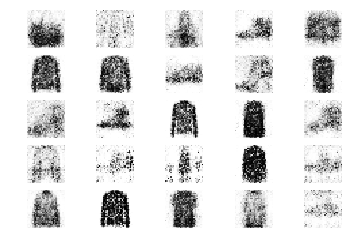

2701 [D loss: 0.640572, acc.: 62.50%] [G loss: 0.998566]
2702 [D loss: 0.628060, acc.: 68.75%] [G loss: 0.941303]
2703 [D loss: 0.643815, acc.: 57.81%] [G loss: 0.919305]
2704 [D loss: 0.622644, acc.: 65.62%] [G loss: 0.927852]
2705 [D loss: 0.678557, acc.: 57.81%] [G loss: 1.081445]
2706 [D loss: 0.693891, acc.: 53.12%] [G loss: 0.990745]
2707 [D loss: 0.536323, acc.: 73.44%] [G loss: 0.891819]
2708 [D loss: 0.634964, acc.: 65.62%] [G loss: 0.973655]
2709 [D loss: 0.658020, acc.: 51.56%] [G loss: 1.051504]
2710 [D loss: 0.601135, acc.: 67.19%] [G loss: 0.967606]
2711 [D loss: 0.653303, acc.: 57.81%] [G loss: 1.049143]
2712 [D loss: 0.620879, acc.: 73.44%] [G loss: 1.017568]
2713 [D loss: 0.601643, acc.: 70.31%] [G loss: 0.966236]
2714 [D loss: 0.692242, acc.: 54.69%] [G loss: 0.999084]
2715 [D loss: 0.711871, acc.: 54.69%] [G loss: 0.929103]
2716 [D loss: 0.599625, acc.: 70.31%] [G loss: 0.922073]
2717 [D loss: 0.614787, acc.: 71.88%] [G loss: 0.846488]
2718 [D loss: 0.616841, acc.: 7

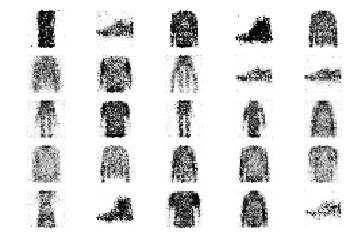

2751 [D loss: 0.664813, acc.: 50.00%] [G loss: 0.894363]
2752 [D loss: 0.620024, acc.: 62.50%] [G loss: 0.946436]
2753 [D loss: 0.628735, acc.: 59.38%] [G loss: 0.979518]
2754 [D loss: 0.714149, acc.: 48.44%] [G loss: 0.923987]
2755 [D loss: 0.546522, acc.: 73.44%] [G loss: 0.979414]
2756 [D loss: 0.628449, acc.: 62.50%] [G loss: 0.958860]
2757 [D loss: 0.615480, acc.: 64.06%] [G loss: 0.913453]
2758 [D loss: 0.595400, acc.: 73.44%] [G loss: 0.904526]
2759 [D loss: 0.638386, acc.: 57.81%] [G loss: 0.974543]
2760 [D loss: 0.582274, acc.: 71.88%] [G loss: 0.963800]
2761 [D loss: 0.580714, acc.: 71.88%] [G loss: 0.907780]
2762 [D loss: 0.525237, acc.: 75.00%] [G loss: 0.964636]
2763 [D loss: 0.603323, acc.: 68.75%] [G loss: 1.056474]
2764 [D loss: 0.633253, acc.: 67.19%] [G loss: 0.904271]
2765 [D loss: 0.569420, acc.: 68.75%] [G loss: 0.968012]
2766 [D loss: 0.581905, acc.: 67.19%] [G loss: 1.012076]
2767 [D loss: 0.684766, acc.: 50.00%] [G loss: 1.003115]
2768 [D loss: 0.671635, acc.: 5

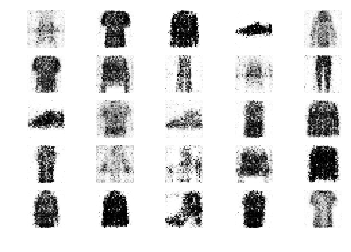

2801 [D loss: 0.558538, acc.: 68.75%] [G loss: 1.015437]
2802 [D loss: 0.634279, acc.: 60.94%] [G loss: 1.076967]
2803 [D loss: 0.686590, acc.: 57.81%] [G loss: 1.059935]
2804 [D loss: 0.548841, acc.: 78.12%] [G loss: 1.011660]
2805 [D loss: 0.590650, acc.: 64.06%] [G loss: 0.921089]
2806 [D loss: 0.626941, acc.: 60.94%] [G loss: 0.919343]
2807 [D loss: 0.606555, acc.: 68.75%] [G loss: 0.934796]
2808 [D loss: 0.591836, acc.: 60.94%] [G loss: 1.052539]
2809 [D loss: 0.641868, acc.: 51.56%] [G loss: 0.999179]
2810 [D loss: 0.646038, acc.: 60.94%] [G loss: 0.967816]
2811 [D loss: 0.671064, acc.: 51.56%] [G loss: 0.965057]
2812 [D loss: 0.638984, acc.: 62.50%] [G loss: 0.921755]
2813 [D loss: 0.622436, acc.: 60.94%] [G loss: 1.010011]
2814 [D loss: 0.620657, acc.: 68.75%] [G loss: 0.878642]
2815 [D loss: 0.588578, acc.: 75.00%] [G loss: 1.013902]
2816 [D loss: 0.608578, acc.: 67.19%] [G loss: 0.902552]
2817 [D loss: 0.562607, acc.: 78.12%] [G loss: 0.972468]
2818 [D loss: 0.646490, acc.: 5

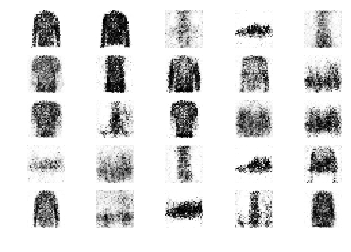

2851 [D loss: 0.620444, acc.: 68.75%] [G loss: 1.018802]
2852 [D loss: 0.713080, acc.: 57.81%] [G loss: 0.948532]
2853 [D loss: 0.648237, acc.: 53.12%] [G loss: 0.919922]
2854 [D loss: 0.592112, acc.: 68.75%] [G loss: 1.061001]
2855 [D loss: 0.600291, acc.: 62.50%] [G loss: 1.052308]
2856 [D loss: 0.641670, acc.: 65.62%] [G loss: 0.950704]
2857 [D loss: 0.602439, acc.: 64.06%] [G loss: 0.960632]
2858 [D loss: 0.624556, acc.: 62.50%] [G loss: 0.936804]
2859 [D loss: 0.667697, acc.: 60.94%] [G loss: 0.906141]
2860 [D loss: 0.638644, acc.: 62.50%] [G loss: 0.761360]
2861 [D loss: 0.639036, acc.: 62.50%] [G loss: 0.976081]
2862 [D loss: 0.657792, acc.: 50.00%] [G loss: 0.886192]
2863 [D loss: 0.609807, acc.: 65.62%] [G loss: 0.851777]
2864 [D loss: 0.572788, acc.: 70.31%] [G loss: 0.907856]
2865 [D loss: 0.627953, acc.: 59.38%] [G loss: 0.893199]
2866 [D loss: 0.658068, acc.: 67.19%] [G loss: 1.070481]
2867 [D loss: 0.622110, acc.: 68.75%] [G loss: 1.034614]
2868 [D loss: 0.615215, acc.: 6

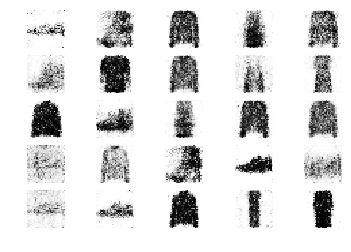

2901 [D loss: 0.665013, acc.: 62.50%] [G loss: 0.959552]
2902 [D loss: 0.610583, acc.: 68.75%] [G loss: 0.987270]
2903 [D loss: 0.613802, acc.: 64.06%] [G loss: 1.004886]
2904 [D loss: 0.553648, acc.: 79.69%] [G loss: 0.932501]
2905 [D loss: 0.661156, acc.: 57.81%] [G loss: 0.888336]
2906 [D loss: 0.614458, acc.: 70.31%] [G loss: 0.907909]
2907 [D loss: 0.655683, acc.: 59.38%] [G loss: 1.018469]
2908 [D loss: 0.681638, acc.: 57.81%] [G loss: 1.039229]
2909 [D loss: 0.615919, acc.: 64.06%] [G loss: 1.040241]
2910 [D loss: 0.582017, acc.: 71.88%] [G loss: 1.032656]
2911 [D loss: 0.616151, acc.: 65.62%] [G loss: 0.861524]
2912 [D loss: 0.662299, acc.: 59.38%] [G loss: 0.993726]
2913 [D loss: 0.638449, acc.: 64.06%] [G loss: 0.990497]
2914 [D loss: 0.660682, acc.: 57.81%] [G loss: 0.931481]
2915 [D loss: 0.657670, acc.: 60.94%] [G loss: 1.038824]
2916 [D loss: 0.624080, acc.: 59.38%] [G loss: 0.996676]
2917 [D loss: 0.652587, acc.: 60.94%] [G loss: 1.040883]
2918 [D loss: 0.615046, acc.: 6

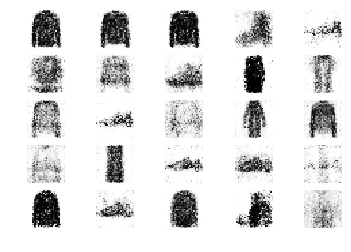

2951 [D loss: 0.609432, acc.: 70.31%] [G loss: 1.078606]
2952 [D loss: 0.677132, acc.: 64.06%] [G loss: 1.025342]
2953 [D loss: 0.640411, acc.: 64.06%] [G loss: 1.057337]
2954 [D loss: 0.629514, acc.: 62.50%] [G loss: 0.942544]
2955 [D loss: 0.606950, acc.: 65.62%] [G loss: 0.933071]
2956 [D loss: 0.648638, acc.: 54.69%] [G loss: 0.930925]
2957 [D loss: 0.611191, acc.: 64.06%] [G loss: 0.950382]
2958 [D loss: 0.556693, acc.: 71.88%] [G loss: 0.808519]
2959 [D loss: 0.697591, acc.: 46.88%] [G loss: 0.815558]
2960 [D loss: 0.552579, acc.: 79.69%] [G loss: 0.947410]
2961 [D loss: 0.658079, acc.: 59.38%] [G loss: 0.917195]
2962 [D loss: 0.711453, acc.: 53.12%] [G loss: 0.878724]
2963 [D loss: 0.610830, acc.: 67.19%] [G loss: 0.947291]
2964 [D loss: 0.630832, acc.: 64.06%] [G loss: 0.989155]
2965 [D loss: 0.635878, acc.: 67.19%] [G loss: 0.932001]
2966 [D loss: 0.595207, acc.: 64.06%] [G loss: 1.038423]
2967 [D loss: 0.611778, acc.: 60.94%] [G loss: 0.982139]
2968 [D loss: 0.630184, acc.: 6

In [79]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

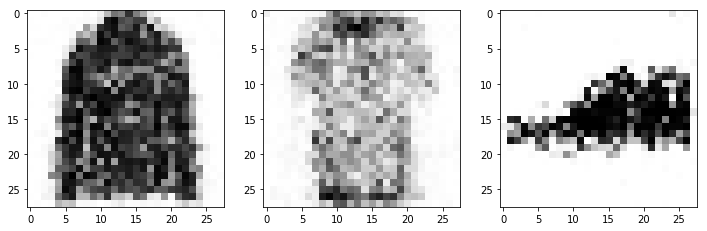

In [198]:
# Generating noise for the model to predict on
noise = np.random.normal(0, 1, (5*5, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()